<a href="https://www.kaggle.com/code/gabrielever/integrador-one?scriptVersionId=111494763" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Algoritmo de fatorial na forma recursiva
def recursion(num):
    if num <= 1:
        return num
    return num * recursion(num-1)
# Algoritmo de fatorial na forma de itera√ß√£o
def interf(num):
    curr = num
    res = 1
    while True:
        if curr == 0:
            break
        res *= curr
        curr -= 1
    return res

if __name__ == "__main__":
    print(interf(9999999)) # 9 Milh√µes
    print(recursion(4))

24
24


In [27]:
13883 % 101

46

In [32]:
2 ** 512

13407807929942597099574024998205846127479365820592393377723561443721764030073546976801874298166903427690031858186486050853753882811946569946433649006084096

In [18]:
import time
from functools import wraps

def getTime(func):
    @wraps(func)
    def wrapper(*args):
        start = time.time()
        res = func(*args)
        end = time.time()
        print(f"\n{func.__name__} Dura√ß√£o: {((end-start)*(10**3)):.2f}ms\nResultado > {res} <")
    return wrapper

@getTime
def recursion(n)->int:
    #checar tempo de execu√ß√£o em casos muito pequenos
    #time.sleep(1)
    def rec(num):
        if num == 0:
            return 0
        elif num == 1:
            return 1
        else:
            return (rec(num-1) + rec(num-2))
    if n>1:
        return rec(n-1)
    else:
        return rec(n)

@getTime
def interf(num):
    #checar tempo de execu√ß√£o em casos muito pequenos
    #time.sleep(1)
    u = 0
    v = 1
    res = 0

    if num == 0:
        return u
    elif num == 1:
        return v
    else:
        for i in range(2, num):
            c = u+v
            u = v
            v = c
        return v

if __name__ == "__main__":
    interf(9999999) # 9 Milh√µeeeeeeeeees
    recursion(2)


interf Dura√ß√£o: 1054277.15ms
Resultado > 43155833082399860399840475145919678878722270121917934792905922517131315915061095950694109227904557092618770337112264892080294204430420202190590117273370941030972720736379155457871045024215585995886689736777630469566507633513813889413585246542610029387923409099709261396308569332203420978278036034768477576768579455632841520832412545360301220401486657481765605192349566865050561743706933248959602927950011687690666981663198277155628690269636679684510010652863762464827217993621327478708389222611628416368719634194476896521634404822413470679227561514459184962478997708900000685104116011697502285166559549546505396342708026942565907387561732698455479165595580405123166496368856176320089407548040681356577490239322441264501873257830689686425854327181722773595296900868857359370109467878589407232939263017975779824780156368495844217213223005162868929966606801496515833387416055016362822981392933864629122228772596921578173157804467514329272169883764875720370127

## **Projeto Integrador I**
 **Ci√™ncias de Dados | Fatec Baixada Santista**
 * Estudo acerca da influ√™ncia do contexto social no desempenho do Enem
 * **Atualiza√ß√£o:** Atualmente em est√°gio de Organiza√ß√£o de C√≥digo | 20% completo
 * Tableau: https://public.tableau.com/app/profile/gabriel.luiz5875

In [15]:
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly.express as px
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot') # ggplot (Cinza)| dark_background (Dark)

In [33]:
# Dados brutos | N√£o utilize, pos precisar√° passar por tratamento
df = pd.read_csv('../input/ds-integrador-one/MICRODADOS_ENEM_2021.csv', sep=';', encoding='latin-1')

### **Dados j√° tratados para a An√°lise**
* N√£o √© necess√°rio realizar nenhuma ac√£o, somente  nas variaveis

In [39]:
# Dados limpos e j√° tratados (df: contidas as colunas originais | ds: colunas uteis para a an√°lise)
df = pd.read_csv('../input/treated-data/DadosTratados.csv', sep=';', encoding='latin-1')
ds = pd.read_csv('../input/treated-data/DadosSelecionados.csv', sep=';', encoding='latin-1')

## **Tratamento, Limpesa e Manipula√ß√£o de Dados**
> Aten√ß√£o: Esse foi o algoritmo criado e utilizado por mim, aplicados nos dados
* Ajustar, selecionar os crit√©rios para nossos dados
* Organizar as siglas e alternativas para torn√°-las identificaveis para a an√°lise
* Cria√ß√£o de duas novas colunas para a classe e pontua√ß√£o (5h a 10h de execu√ß√£o)
[](https://fatecspgov-my.sharepoint.com/personal/gabriel_silva637_fatec_sp_gov_br/Documents/Image/Web/Integrador%20One%20(2820%C2%A0%C3%97%C2%A01200%C2%A0px)%20(2820%C2%A0%C3%97%C2%A0800%C2%A0px)%20(2820%C2%A0%C3%97%C2%A0600%C2%A0px).jpg)


In [ ]:
# Tamanha antes
print(f'Antes: {df.shape[0]}')

# Selecionar jovens entre 17 a 29 (pode incluir 30, pois s√£o dados continuos "Entre 26 e 30 anos")
df = df.loc[ (df['TP_FAIXA_ETARIA'] <= 10) & (df['TP_FAIXA_ETARIA'] != 1) & (df['TP_NACIONALIDADE'] == 1), : ]

# Remover linha caso todos os dados do question√°rio sejam Nulos (Testado em caso tenha algum, resulta em mesmo resultado)
df = df.dropna( axis=0, how='all', subset=['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']).reset_index(drop=True)

# Tamanho depois
print(f'Depois: {df.shape[0]}')

Manipula√ß√£o para tornar mais facil a leitura

In [ ]:
# Faixa Et√°ria
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].apply( lambda x : 'Menor 17' if x == 1 else
                                                                '17 anos' if x == 2 else
                                                                '18 anos' if x == 3 else
                                                                '19 anos' if x == 4 else
                                                                '20 anos' if x == 5 else
                                                                '21 anos' if x == 6 else
                                                                '22 anos' if x == 7 else
                                                                '23 anos' if x == 8 else
                                                                '24 anos' if x == 9 else
                                                                '25 anos' if x == 10 else
                                                                '26 e 30 anos' if x == 11 else
                                                                '31 e 35 anos' if x == 12 else
                                                                '36 e 40 anos' if x == 13 else
                                                                '41 e 45 anos' if x == 14 else
                                                                '46 e 50 anos' if x == 15 else
                                                                '51 e 55 anos' if x == 16 else
                                                                '56 e 60 anos' if x == 17 else
                                                                '61 e 65 anos' if x == 18 else
                                                                '66 e 70 anos' if x == 19 else
                                                                'Maior de 70' if x == 20 else np.nan )

# Situa√ß√£o Civil
df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].apply( lambda x : 'N√£o informado' if x == 0 else
                                                                'Solteiro(a)' if x == 1 else
                                                                'Casado(a)/Mora com companheiro(a)' if x == 2 else
                                                                'Casado(a)/Mora com companheiro(a)' if x == 3 else
                                                                'Vi√∫vo(a)' if x == 4 else np.nan )

# Racial
df['TP_COR_RACA'] = df['TP_COR_RACA'].apply( lambda x : 'N√£o declarado' if x == 0 else
                                                        'Branca' if x == 1 else
                                                        'Preta' if x == 2 else
                                                        'Parda' if x == 3 else
                                                        'Amarela' if x == 4 else
                                                        'Ind√≠gena' if x == 5 else
                                                        'N√£o disp√µe da informa√ß√£o' if x == 6 else np.nan )

# Nacionalidade
df['TP_NACIONALIDADE'] = df['TP_NACIONALIDADE'].apply( lambda x : 'N√£o informado' if x == 0 else
                                                                  'Brasileiro(a)' if x == 1 else
                                                                  'Brasileiro(a) Naturalizado(a)' if x == 2 else
                                                                  'Estrangeiro(a)' if x == 3 else
                                                                  'Brasileiro(a) Nato(a), nascido(a) no exterior' if x == 4 else np.nan )

# Situa√ß√£o de conclus√£o do Ensino M√©dio
df['TP_ST_CONCLUSAO'] = df['TP_ST_CONCLUSAO'].apply( lambda x : 'J√° conclu√≠ o Ensino M√©dio' if x == 1 else
                                                                'Estou cursando e concluirei o Ensino M√©dio em 2021' if x == 2 else
                                                                'Estou cursando e concluirei o Ensino M√©dio ap√≥s 2021' if x == 3 else
                                                                'N√£o conclu√≠ e n√£o estou cursando o Ensino M√©dio' if x == 4 else
                                                                'Brasileiro(a) Nato(a), nascido(a) no exterior' if x == 4 else np.nan )

# Ano de Conclus√£o do Ensino M√©dio
df['TP_ANO_CONCLUIU'] = df['TP_ANO_CONCLUIU'].apply( lambda x : 'N√£o informado' if x == 0 else
                                                                '2020' if x == 1 else
                                                                '2019' if x == 2 else
                                                                '2018' if x == 3 else
                                                                '2017' if x == 4 else
                                                                '2016' if x == 5 else
                                                                '2015' if x == 6 else                                  
                                                                '2014' if x == 7 else
                                                                '2013' if x == 8 else
                                                                '2012' if x == 9 else                                                         
                                                                '2011' if x == 10 else
                                                                '2010' if x == 11 else
                                                                '2009' if x == 12 else                                                                
                                                                '2008' if x == 13 else
                                                                '2007' if x == 14 else
                                                                'Antes de 2007' if x == 15 else np.nan )

# Tipo de escola do Ensino M√©dio
df['TP_ESCOLA'] = df['TP_ESCOLA'].apply( lambda x : 'N√£o Respondeu' if x == 1 else
                                                    'P√∫blica' if x == 2 else
                                                    'Privada' if x == 3 else np.nan )

# Tipo de institui√ß√£o que concluiu ou concluir√° o Ensino M√©dio
df['TP_ENSINO'] = df['TP_ENSINO'].apply( lambda x : 'Ensino Regular' if x == 1 else
                                                    'Educa√ß√£o Especial - Modalidade Substitutiva' if x == 2 else np.nan )

# Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos3
df['IN_TREINEIRO'] = df['IN_TREINEIRO'].apply( lambda x : 'Sim' if x == 1 else
                                                          'N√£o' if x == 0 else np.nan )

# Depend√™ncia administrativa (Escola)
df['TP_DEPENDENCIA_ADM_ESC'] = df['TP_DEPENDENCIA_ADM_ESC'].apply( lambda x : 'Federal' if x == 1 else
                                                                              'Estadual' if x == 2 else
                                                                              'Municipal' if x == 3 else
                                                                              'Privada' if x == 4 else np.nan )

# Localiza√ß√£o (Escola)
df['TP_LOCALIZACAO_ESC'] = df['TP_LOCALIZACAO_ESC'].apply( lambda x : 'Urbana' if x == 1 else
                                                                      'Rural' if x == 2 else np.nan )

# Situa√ß√£o de funcionamento (Escola)
df['TP_SIT_FUNC_ESC'] = df['TP_SIT_FUNC_ESC'].apply( lambda x : 'Em atividade' if x == 1 else
                                                                'Paralisada' if x == 2 else
                                                                'Extinta' if x == 3 else
                                                                'Escola extinta em anos anteriores' if x == 4 else np.nan )

# Presen√ßa na prova objetiva de Ci√™ncias da Natureza
df['TP_PRESENCA_CN'] = df['TP_PRESENCA_CN'].apply( lambda x : 'Faltou √† prova' if x == 0 else
                                                              'Presente na prova' if x == 1 else
                                                              'Eliminado na prova' if x == 2 else np.nan )

# Presen√ßa na prova objetiva de Ci√™ncias Humanas
df['TP_PRESENCA_CH'] = df['TP_PRESENCA_CH'].apply( lambda x : 'Faltou √† prova' if x == 0 else
                                                              'Presente na prova' if x == 1 else
                                                              'Eliminado na prova' if x == 2 else np.nan )

# Presen√ßa na prova objetiva de Linguagens e C√≥digos
df['TP_PRESENCA_LC'] = df['TP_PRESENCA_LC'].apply( lambda x : 'Faltou √† prova' if x == 0 else
                                                              'Presente na prova' if x == 1 else
                                                              'Eliminado na prova' if x == 2 else np.nan )

# Presen√ßa na prova objetiva de Matem√°tica
df['TP_PRESENCA_MT'] = df['TP_PRESENCA_MT'].apply( lambda x : 'Faltou √† prova' if x == 0 else
                                                              'Presente na prova' if x == 1 else
                                                              'Eliminado na prova' if x == 2 else np.nan )

# C√≥digo do tipo de prova de Ci√™ncias da Natureza
df['CO_PROVA_CN'] = df['CO_PROVA_CN'].apply( lambda x : 'Azul' if x == 909 else
                                                        'Amarela' if x == 910 else
                                                        'Cinza' if x == 911 else
                                                        'Rosa' if x == 912 else
                                                        'Laranja - Braille' if x == 915 else
                                                        'Laranja - Adaptada Ledor' if x == 916 else
                                                        'Verde - Videoprova - Libras' if x == 917 else
                                                        'Azul (Reaplica√ß√£o)' if x == 989 else
                                                        'Amarela (Reaplica√ß√£o)' if x == 990 else
                                                        'Cinza (Reaplica√ß√£o)' if x == 991 else
                                                        'Rosa (Reaplica√ß√£o)' if x == 992 else
                                                        'Laranja - Adaptada Ledor (Reaplica√ß√£o)' if x == 996 else
                                                        'Azul (Digital)' if x == 1011 else
                                                        'Amarela (Digital)' if x == 1012 else
                                                        'Rosa (Digital)' if x == 1013 else
                                                        'Cinza (Digital)' if x == 1014 else
                                                        'Azul (Segunda oportunidade)' if x == 1045 else
                                                        'Amarela (Segunda oportunidade)' if x == 1046 else
                                                        'Cinza (Segunda oportunidade)' if x == 1047 else
                                                        'Rosa (Segunda oportunidade)' if x == 1048 else
                                                        'Laranja - Adaptada Ledor (Segunda oportunidade)' if x == 1052 else np.nan )

# C√≥digo do tipo de prova de Ci√™ncias Humanas
df['CO_PROVA_CH'] = df['CO_PROVA_CH'].apply( lambda x : 'Azul' if x == 879 else
                                                        'Amarela' if x == 880 else
                                                        'Cinza' if x == 881 else
                                                        'Rosa' if x == 882 else
                                                        'Laranja - Braille' if x == 885 else
                                                        'Laranja - Adaptada Ledor' if x == 886 else
                                                        'Verde - Videoprova - Libras' if x == 887 else
                                                        'Azul (Reaplica√ß√£o)' if x == 959 else
                                                        'Amarela (Reaplica√ß√£o)' if x == 960 else
                                                        'Cinza (Reaplica√ß√£o)' if x == 961 else
                                                        'Rosa (Reaplica√ß√£o)' if x == 962 else
                                                        'Laranja - Adaptada Ledor (Reaplica√ß√£o)' if x == 966 else
                                                        'Azul (Digital)' if x == 999 else
                                                        'Amarela (Digital)' if x == 1000 else
                                                        'Rosa (Digital)' if x == 1001 else
                                                        'Cinza (Digital)' if x == 1002 else
                                                        'Azul (Segunda oportunidade)' if x == 1015 else
                                                        'Amarela (Segunda oportunidade)' if x == 1016 else
                                                        'Cinza (Segunda oportunidade)' if x == 1017 else
                                                        'Rosa (Segunda oportunidade)' if x == 1018 else
                                                        'Laranja - Adaptada Ledor (Segunda oportunidade)' if x == 1022 else np.nan )

# C√≥digo do tipo de prova de Linguagens e C√≥digos
df['CO_PROVA_LC'] = df['CO_PROVA_LC'].apply( lambda x : 'Azul' if x == 889 else
                                                        'Amarela' if x == 890 else
                                                        'Cinza' if x == 891 else
                                                        'Rosa' if x == 892 else
                                                        'Laranja - Braille' if x == 895 else
                                                        'Laranja - Adaptada Ledor' if x == 896 else
                                                        'Verde - Videoprova - Libras' if x == 897 else
                                                        'Azul (Reaplica√ß√£o)' if x == 969 else
                                                        'Amarela (Reaplica√ß√£o)' if x == 970 else
                                                        'Cinza (Reaplica√ß√£o)' if x == 971 else
                                                        'Rosa (Reaplica√ß√£o)' if x == 972 else
                                                        'Laranja - Adaptada Ledor (Reaplica√ß√£o)' if x == 976 else
                                                        'Azul (Digital)' if x == 1003 else
                                                        'Amarela (Digital)' if x == 1004 else
                                                        'Rosa (Digital)' if x == 1005 else
                                                        'Cinza (Digital)' if x == 1006 else
                                                        'Azul (Segunda oportunidade)' if x == 1025 else
                                                        'Amarela (Segunda oportunidade)' if x == 1026 else
                                                        'Cinza (Segunda oportunidade)' if x == 1027 else
                                                        'Rosa (Segunda oportunidade)' if x == 1028 else
                                                        'Laranja - Adaptada Ledor (Segunda oportunidade)' if x == 1032 else np.nan )

# C√≥digo do tipo de prova de Matem√°tica
df['CO_PROVA_MT'] = df['CO_PROVA_MT'].apply( lambda x : 'Azul' if x == 899 else
                                                        'Amarela' if x == 900 else
                                                        'Cinza' if x == 901 else
                                                        'Rosa' if x == 902 else
                                                        'Laranja - Braille' if x == 905 else
                                                        'Laranja - Adaptada Ledor' if x == 906 else
                                                        'Verde - Videoprova - Libras' if x == 907 else
                                                        'Azul (Reaplica√ß√£o)' if x == 979 else
                                                        'Amarela (Reaplica√ß√£o)' if x == 980 else
                                                        'Cinza (Reaplica√ß√£o)' if x == 981 else
                                                        'Rosa (Reaplica√ß√£o)' if x == 982 else
                                                        'Laranja - Adaptada Ledor (Reaplica√ß√£o)' if x == 986 else
                                                        'Azul (Digital)' if x == 1007 else
                                                        'Amarela (Digital)' if x == 1008 else
                                                        'Rosa (Digital)' if x == 1009 else
                                                        'Cinza (Digital)' if x == 1010 else
                                                        'Azul (Segunda oportunidade)' if x == 1035 else
                                                        'Amarela (Segunda oportunidade)' if x == 1036 else
                                                        'Cinza (Segunda oportunidade)' if x == 1037 else
                                                        'Rosa (Segunda oportunidade)' if x == 1038 else
                                                        'Laranja - Adaptada Ledor (Segunda oportunidade)' if x == 1042 else np.nan )

# L√≠ngua Estrangeira 
df['TP_LINGUA'] = df['TP_LINGUA'].apply( lambda x : 'Ingl√™s' if x == 0 else 'Espanhol' if x == 1 else np.nan )

# Situa√ß√£o da reda√ß√£o do participante
df['TP_STATUS_REDACAO'] = df['TP_STATUS_REDACAO'].apply( lambda x : 'Sem problemas' if x == 1 else
                                                                    'Anulada' if x == 2 else
                                                                    'C√≥pia Texto Motivador' if x == 3 else 
                                                                    'Em Branco' if x == 4 else
                                                                    'Fuga ao tema' if x == 6 else
                                                                    'N√£o atendimento ao tipo textual' if x == 7 else 
                                                                    'Texto insuficiente' if x == 8 else
                                                                    'Parte desconectada' if x == 9 else np.nan )

# At√© que s√©rie seu pai, ou o homem respons√°vel por voc√™, estudou?
df['Q001'] = df['Q001'].apply( lambda x : 'Nunca estudou' if x == 'A' else
                                          'N√£o completou a 4¬™ s√©rie/5¬∫ ano do Ensino Fundamental' if x == 'B' else
                                          'Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental' if x == 'C' else
                                          'Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio' if x == 'D' else
                                          'Completou o Ensino M√©dio, mas n√£o completou a Faculdade' if x == 'E' else
                                          'Completou a Faculdade, mas n√£o completou a P√≥s-gradua√ß√£o' if x == 'F' else                                  
                                          'Completou a P√≥s-gradua√ß√£o' if x == 'G' else
                                          'N√£o sei' if x == 'H' else np.nan )

# At√© que s√©rie sua m√£e, ou a mulher respons√°vel por voc√™, estudou?
df['Q002'] = df['Q002'].apply( lambda x : 'Nunca estudou' if x == 'A' else
                                          'N√£o completou a 4¬™ s√©rie/5¬∫ ano do Ensino Fundamental' if x == 'B' else
                                          'Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental' if x == 'C' else
                                          'Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio' if x == 'D' else
                                          'Completou o Ensino M√©dio, mas n√£o completou a Faculdade' if x == 'E' else
                                          'Completou a Faculdade, mas n√£o completou a P√≥s-gradua√ß√£o' if x == 'F' else                                  
                                          'Completou a P√≥s-gradua√ß√£o' if x == 'G' else
                                          'N√£o sei' if x == 'H' else np.nan )

# A partir da apresenta√ß√£o de algumas ocupa√ß√µes divididas em grupos ordenados, indique o grupo que
# contempla a ocupa√ß√£o mais pr√≥xima da ocupa√ß√£o do seu pai ou do homem respons√°vel por voc√™.
# (Se ele n√£o estiver trabalhando, escolha uma ocupa√ß√£o pensando no √∫ltimo trabalho dele).
""" Original
df['Q003'] = df['Q003'].apply( lambda x : 'Grupo 1: Lavrador, agricultor sem empregados, b√≥ia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista' if x == 'A' else
                                          'Grupo 2: Diarista, empregado dom√©stico, cuidador de idosos, bab√°, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e pr√©dios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria' if x == 'B' else
                                          'Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mec√¢nico, operador de m√°quinas, soldador, oper√°rio de f√°brica, trabalhador da minera√ß√£o, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista' if x == 'C' else
                                          'Grupo 4: Professor (de ensino fundamental ou m√©dio, idioma, m√∫sica, artes etc.), t√©cnico (de enfermagem, contabilidade, eletr√¥nica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de im√≥veis, supervisor, gerente, mestre de obras, pastor, microempres√°rio (propriet√°rio de empresa com menos de 10 empregados), pequeno comerciante, pequeno propriet√°rio de terras, trabalhador aut√¥nomo ou por conta pr√≥pria' if x == 'D' else
                                          'Grupo 5: M√©dico, engenheiro, dentista, psic√≥logo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capit√£o, coronel, professor universit√°rio, diretor em empresas p√∫blicas ou privadas, pol√≠tico, propriet√°rio de empresas com mais de 10 empregados' if x == 'E' else
                                          'N√£o sei' if x == 'F' else np.nan )

# A partir da apresenta√ß√£o de algumas ocupa√ß√µes divididas em grupos ordenados, indique o grupo que
# contempla a ocupa√ß√£o mais pr√≥xima da ocupa√ß√£o da sua m√£e ou da mulher respons√°vel por voc√™.
# (Se ela n√£o estiver trabalhando, escolha uma ocupa√ß√£o pensando no √∫ltimo trabalho dela).
df['Q004'] = df['Q004'].apply( lambda x : 'Grupo 1: Lavradora, agricultora sem empregados, b√≥ia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista' if x == 'A' else
                                          'Grupo 2: Diarista, empregada dom√©stica, cuidadora de idosos, bab√°, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e pr√©dios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria' if x == 'B' else
                                          'Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mec√¢nica, operadora de m√°quinas, soldadora, oper√°ria de f√°brica, trabalhadora da minera√ß√£o, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista' if x == 'C' else
                                          'Grupo 4: Professora (de ensino fundamental ou m√©dio, idioma, m√∫sica, artes etc.), t√©cnica (de enfermagem, contabilidade, eletr√¥nica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de im√≥veis, supervisora, gerente, mestre de obras, pastora, microempres√°ria (propriet√°ria de empresa com menos de 10 empregados), pequena comerciante, pequena propriet√°ria de terras, trabalhadora aut√¥noma ou por conta pr√≥pria' if x == 'D' else
                                          'Grupo 5: M√©dica, engenheira, dentista, psic√≥loga, economista, advogada, ju√≠za, promotora, defensora, delegada, tenente, capit√£, coronel, professora universit√°ria, diretora em empresas p√∫blicas ou privadas, pol√≠tica, propriet√°ria de empresas com mais de 10 empregados' if x == 'E' else
                                          'N√£o sei' if x == 'F' else np.nan )
"""


df['Q003'] = df['Q003'].apply( lambda x : 'Grupo 1' if x == 'A' else
                                          'Grupo 2' if x == 'B' else
                                          'Grupo 3' if x == 'C' else
                                          'Grupo 4' if x == 'D' else
                                          'Grupo 5' if x == 'E' else
                                          'N√£o sei' if x == 'F' else np.nan )

# A partir da apresenta√ß√£o de algumas ocupa√ß√µes divididas em grupos ordenados, indique o grupo que
# contempla a ocupa√ß√£o mais pr√≥xima da ocupa√ß√£o da sua m√£e ou da mulher respons√°vel por voc√™.
# (Se ela n√£o estiver trabalhando, escolha uma ocupa√ß√£o pensando no √∫ltimo trabalho dela).
df['Q004'] = df['Q004'].apply( lambda x : 'Grupo 1' if x == 'A' else
                                          'Grupo 2' if x == 'B' else
                                          'Grupo 3' if x == 'C' else
                                          'Grupo 4' if x == 'D' else
                                          'Grupo 5' if x == 'E' else
                                          'N√£o sei' if x == 'F' else np.nan )

# Qual √© a renda mensal de sua fam√≠lia? (Some a sua renda com a dos seus familiares.)
""" Original
df['Q006'] = df['Q006'].apply( lambda x : 'Nenhuma Renda' if x == 'A' else
                                          'At√© RS 1.100,00' if x == 'B' else
                                          'De RS 1.100,01 at√© RS 1.650,00' if x == 'C' else
                                          'De RS 1.650,01 at√© RS 2.200,00' if x == 'D' else
                                          'De RS 2.200,01 at√© RS 2.750,00' if x == 'E' else
                                          'De RS 2.750,01 at√© RS 3.300,00' if x == 'F' else
                                          'De RS 3.300,01 at√© RS 4.400,00' if x == 'G' else
                                          'De RS 4.400,01 at√© RS 5.500,00' if x == 'H' else
                                          'De RS 5.500,01 at√© RS 6.600,00' if x == 'I' else
                                          'De RS 6.600,01 at√© RS 7.700,00' if x == 'J' else
                                          'De RS 7.700,01 at√© RS 8.800,00' if x == 'K' else
                                          'De RS 8.800,01 at√© RS 9.900,00' if x == 'L' else
                                          'De RS 9.900,01 at√© RS 11.000,00' if x == 'M' else
                                          'De RS 11.000,01 at√© RS 13.200,00' if x == 'N' else
                                          'De RS 13.200,01 at√© RS 16.500,00' if x == 'O' else
                                          'De RS 16.500,01 at√© RS 22.000,00' if x == 'P' else
                                          'Acima de R$ 22.000,00' if x == 'Q' else np.nan )
"""
# Qual √© a renda mensal de sua fam√≠lia? (Some a sua renda com a dos seus familiares.)
df['Q006'] = df['Q006'].apply( lambda x : 0 if x == 'A' else
                                          1100.0 if x == 'B' else
                                          1650.0 if x == 'C' else
                                          2200.0 if x == 'D' else
                                          2750.0 if x == 'E' else
                                          3300.0 if x == 'F' else
                                          4400.0 if x == 'G' else
                                          5500.0 if x == 'H' else
                                          6600.0 if x == 'I' else
                                          7700.0 if x == 'J' else
                                          8800.0 if x == 'K' else
                                          9900.0 if x == 'L' else
                                          11000.0 if x == 'M' else
                                          13200.0 if x == 'N' else
                                          16500.0 if x == 'O' else
                                          22000.0 if x == 'P' else
                                          22999.9 if x == 'Q' else np.nan )
                              
                              
# Em sua resid√™ncia trabalha empregado(a) dom√©stico(a)?
df['Q007'] = df['Q007'].apply( lambda x : 'N√£o' if x == 'A' else
                                          '1 ou 2 dias por semana' if x == 'B' else
                                          '3 ou 4 dias por semana' if x == 'C' else
                                          'Pelo menos 5 por semana' if x == 'D' else np.nan )

# Na sua resid√™ncia tem banheiro?
df['Q008'] = df['Q008'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem quartos para dormir?
df['Q009'] = df['Q009'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem carro?
df['Q010'] = df['Q010'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem motocicleta?
df['Q011'] = df['Q011'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem geladeira?
df['Q012'] = df['Q012'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem freezer (independente ou segunda porta da geladeira)?
df['Q013'] = df['Q013'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem m√°quina de lavar roupa? (o tanquinho N√ÉO deve ser considerado)
df['Q014'] = df['Q014'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem m√°quina de secar roupa (independente ou em conjunto com a m√°quina de lavar roupa)?
df['Q015'] = df['Q015'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem forno micro-ondas?
df['Q016'] = df['Q016'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem m√°quina de lavar lou√ßa?
df['Q017'] = df['Q017'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem aspirador de p√≥
df['Q018'] = df['Q018'].apply( lambda x : False if x == 'A' else
                                          True if x == 'B' else np.nan )

# Na sua resid√™ncia tem televis√£o em cores?
df['Q019'] = df['Q019'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem aparelho de DVD?
df['Q020'] = df['Q020'].apply( lambda x : False if x == 'A' else
                                          True if x == 'B' else np.nan )

# Na sua resid√™ncia tem TV por assinatura?
df['Q021'] = df['Q021'].apply( lambda x : False if x == 'A' else
                                          True if x == 'B' else np.nan )

# Na sua resid√™ncia tem telefone celular?
df['Q022'] = df['Q022'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem telefone fixo?
df['Q023'] = df['Q023'].apply( lambda x : False if x == 'A' else
                                          True if x == 'B' else np.nan )

# Na sua resid√™ncia tem computador?
df['Q024'] = df['Q024'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua resid√™ncia tem acesso √† Internet?
df['Q025'] = df['Q025'].apply( lambda x : False if x == 'A' else
                                          True if x == 'B' else np.nan )

print('Completo')

Cria√ß√£o da coluna CLASSE e PONTOS | Classe Socioeconomica e sua Pontua√ß√£o **(5Hr de Execu√ß√£o)**

In [41]:
ddf['ESTADO_CIVIL'].unique()

array(['Solteiro(a)', 'N√£o informado',
       'Casado(a)/Mora com companheiro(a)', 'Vi√∫vo(a)'], dtype=object)

In [46]:
ddf.loc[ (ddf['FAIXA_ETARIA'] == '17 anos') & (ddf['ESTADO_CIVIL'] == 'Vi√∫vo(a)'), ['FAIXA_ETARIA', 'GENERO', 'ESTADO_CIVIL', 'SIT_CONCLUCAO_EM', 'TIPO_ESC', 'SIGLA_UF_PV', 'NOTA_NATUREZA','NOTA_HUMANAS','NOTA_LINGUAGENS','NOTA_MATEMATICA'] ]

FAIXA_ETARIA GENERO ESTADO_CIVIL  \
61651        17 anos      M     Vi√∫vo(a)   
66277        17 anos      F     Vi√∫vo(a)   
72710        17 anos      F     Vi√∫vo(a)   
72949        17 anos      M     Vi√∫vo(a)   
74743        17 anos      F     Vi√∫vo(a)   
89333        17 anos      M     Vi√∫vo(a)   
121341       17 anos      F     Vi√∫vo(a)   
133215       17 anos      M     Vi√∫vo(a)   
140788       17 anos      F     Vi√∫vo(a)   
154485       17 anos      M     Vi√∫vo(a)   
157602       17 anos      F     Vi√∫vo(a)   
294914       17 anos      M     Vi√∫vo(a)   
311606       17 anos      M     Vi√∫vo(a)   
339508       17 anos      F     Vi√∫vo(a)   
344060       17 anos      F     Vi√∫vo(a)   
375800       17 anos      M     Vi√∫vo(a)   
428965       17 anos      M     Vi√∫vo(a)   
443831       17 anos      M     Vi√∫vo(a)   
458412       17 anos      M     Vi√∫vo(a)   
505070       17 anos      F     Vi√∫vo(a)   
527653       17 anos      F     Vi√∫vo(a)   
575230       17 anos      F     Vi√∫vo(a)   
625212       17 anos      F     Vi√∫vo(a)   
647771       17 anos      M     Vi√∫vo(a)   
662963       17 anos      M     Vi√∫vo(a)   
679286       17 anos      M     Vi√∫vo(a)   
685316       17 anos      F     Vi√∫vo(a)   
718386       17 anos      M     Vi√∫vo(a)   
724629       17 anos      F     Vi√∫vo(a)   
846952       17 anos      F     Vi√∫vo(a)   
897233       17 anos      M     Vi√∫vo(a)   
953472       17 anos      F     Vi√∫vo(a)   
954507       17 anos      M     Vi√∫vo(a)   
998798       17 anos      F     Vi√∫vo(a)   
1040829      17 anos      F     Vi√∫vo(a)   
1050365      17 anos      M     Vi√∫vo(a)   
1079729      17 anos      M     Vi√∫vo(a)   
1082069      17 anos      F     Vi√∫vo(a)   
1106628      17 anos      M     Vi√∫vo(a)   
1125901      17 anos      M     Vi√∫vo(a)   
1139888      17 anos      M     Vi√∫vo(a)   
1151188      17 anos      M     Vi√∫vo(a)   
1161773      17 anos      M     Vi√∫vo(a)   
1183091      17 anos      F     Vi√∫vo(a)   
1191986      17 anos      M     Vi√∫vo(a)   
1266730      17 anos      F     Vi√∫vo(a)   
1309985      17 anos      M     Vi√∫vo(a)   
1319299      17 anos      M     Vi√∫vo(a)   
1400022      17 anos      M     Vi√∫vo(a)   
1411099      17 anos      F     Vi√∫vo(a)   
1480666      17 anos      M     Vi√∫vo(a)   
1487943      17 anos      M     Vi√∫vo(a)   
1497713      17 anos      M     Vi√∫vo(a)   
1553096      17 anos      M     Vi√∫vo(a)   
1568228      17 anos      F     Vi√∫vo(a)   
1688054      17 anos      M     Vi√∫vo(a)   
1699873      17 anos      M     Vi√∫vo(a)   
1762394      17 anos      M     Vi√∫vo(a)   
1783284      17 anos      M     Vi√∫vo(a)   
1790930      17 anos      F     Vi√∫vo(a)   
1793301      17 anos      F     Vi√∫vo(a)   
1794040      17 anos      M     Vi√∫vo(a)   
1801740      17 anos      M     Vi√∫vo(a)   
1826180      17 anos      F     Vi√∫vo(a)   
1856094      17 anos      M     Vi√∫vo(a)   
1863588      17 anos      F     Vi√∫vo(a)   
1871703      17 anos      M     Vi√∫vo(a)   
1886041      17 anos      M     Vi√∫vo(a)   
1908948      17 anos      F     Vi√∫vo(a)   
1971328      17 anos      M     Vi√∫vo(a)   
2009152      17 anos      M     Vi√∫vo(a)   
2011026      17 anos      M     Vi√∫vo(a)   
2076156      17 anos      F     Vi√∫vo(a)   
2093659      17 anos      M     Vi√∫vo(a)   
2112058      17 anos      F     Vi√∫vo(a)   
2146140      17 anos      F     Vi√∫vo(a)   
2157470      17 anos      M     Vi√∫vo(a)   
2178229      17 anos      M     Vi√∫vo(a)   
2186720      17 anos      M     Vi√∫vo(a)   
2191728      17 anos      F     Vi√∫vo(a)   
2209699      17 anos      M     Vi√∫vo(a)   
2246526      17 anos      M     Vi√∫vo(a)   
2301790      17 anos      M     Vi√∫vo(a)   
2309046      17 anos      F     Vi√∫vo(a)   
2330664      17 anos      F     Vi√∫vo(a)   

                                          SIT_CONCLUCAO_EM       TIPO_ESC  \
61651    Estou cursando e concluirei o Ensino M√©dio em ...  

In [36]:
df.head(80)

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0   210053865474    2021                5       F                1   
1   210052384164    2021               12       M                1   
2   210052589243    2021               13       F                3   
3   210052128335    2021                3       M                1   
4   210051353021    2021                2       F                1   
5   210052391248    2021               10       F                1   
6   210052615524    2021                9       F                0   
7   210054368957    2021                4       F                1   
8   210053417016    2021                8       F                1   
9   210051128744    2021                4       F                1   
10  210052320506    2021                5       F                1   
11  210054444526    2021                2       F                1   
12  210053193408    2021               11       M                2   
13  210051549956    2021                5       M                1   
14  210054173438    2021                5       F                1   
15  210053021203    2021                4       F                1   
16  210053788150    2021                7       F                1   
17  210051519039    2021                8       M                1   
18  210054206376    2021                2       F                1   
19  210053797083    2021               11       M                1   
20  210051604126    2021               13       F                1   
21  210052118573    2021                3       F                1   
22  210054052446    2021                5       F                1   
23  210052655126    2021                3       F                1   
24  210052019575    2021                1       F                1   
25  210052384623    2021                7       F                1   
26  210053778606    2021                2       F                1   
27  210052350230    2021               10       F                1   
28  210052814891    2021                7       M                1   
29  210053980053    2021                3       F                1   
30  210051617453    2021                3       F                1   
31  210052183836    2021                3       F                1   
32  210053156861    2021                9       M                1   
33  210053085526    2021                3       M                1   
34  210053956103    2021                5       F                1   
35  210053686891    2021                5       M                1   
36  210052494734    2021                3       M                1   
37  210054229155    2021                3       M                1   
38  210053702600    2021                3       F                1   
39  210053741476    2021                6       F                1   
40  210054322644    2021                3       F                1   
41  210054349027    2021                2       F                1   
42  210053831961    2021                3       F                1   
43  210053790986    2021                1       M                1   
44  210051934442    2021               11       M                1   
45  210052916275    2021                4       F                1   
46  210052082205    2021                3       F                1   
47  210051840875    2021                4       F                1   
48  210052794431    2021               11       F                1   
49  210051521447    2021                7       F                1   
50  210051819810    2021                4       F                1   
51  210051417174    2021                3       M                1   
52  210051748805    2021                5       F                1   
53  210051850286    2021               11       F                3   
54  210054171092    2021                4       M                1   
55  210052237624    2021                5       M                1   
56  2100542989

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [ ]:
for i in tqdm(range(len(df))):
    # Considerados quetodos possuemagua encanada, mas n√£o rua asfaltada
    pont = 4
# Banheiros
    if df.loc[i, 'Q008'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q008'] == 1:
        pont += 3
        
    elif df.loc[i, 'Q008'] == 2:
        pont += 7
        
    elif df.loc[i, 'Q008'] == 3:
        pont += 10
        
    elif df.loc[i, 'Q008'] == 4:
        pont += 14

# Em sua resid√™ncia trabalha empregado(a) dom√©stico(a)?
    if df.loc[i, 'Q007'] == 0:
        pont += 0
    elif df.loc[i, 'Q007'] == 1:
        pont += 3
    
    elif df.loc[i, 'Q007'] == 2:
        pont += 7
    
    elif df.loc[i, 'Q007'] == 3:
        pont += 10
    
    elif df.loc[i, 'Q007'] == 4:
        pont += 14
        
# Autom√≥veis  
    if df.loc[i, 'Q010'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q010'] == 1:
        pont += 3
    
    elif df.loc[i, 'Q010'] == 2:
        pont += 5
    
    elif df.loc[i, 'Q010'] == 3:
        pont += 8
    
    elif df.loc[i, 'Q010'] == 4:
        pont += 11
    
# Computador  
    if df.loc[i, 'Q024'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q024'] == 1:
        pont += 3
    
    elif df.loc[i, 'Q024'] == 2:
        pont += 6
    
    elif df.loc[i, 'Q024'] == 3:
        pont += 8
    
    elif df.loc[i, 'Q024'] == 4:
        pont += 11
    
    
# Lava Lou√ßas  
    if df.loc[i, 'Q017'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q017'] == 1:
        pont += 3
    
    elif df.loc[i, 'Q017'] == 2:
        pont += 6
    
    elif df.loc[i, 'Q017'] == 3:
        pont += 6
    
    elif df.loc[i, 'Q017'] == 4:
        pont += 6
        
# Geladeira
    if df.loc[i, 'Q012'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q012'] == 1:
        pont += 2
    
    elif df.loc[i, 'Q012'] == 2:
        pont += 3
    
    elif df.loc[i, 'Q012'] == 3:
        pont += 5
    
    elif df.loc[i, 'Q012'] == 4:
        pont += 5
    
# Frezzer
    if df.loc[i, 'Q013'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q013'] == 1:
        pont += 2
    
    elif df.loc[i, 'Q013'] == 2:
        pont += 4
    
    elif df.loc[i, 'Q013'] == 3:
        pont += 6
    
    elif df.loc[i, 'Q013'] == 4:
        pont += 6
    
# Maquina de Lavar
    if df.loc[i, 'Q014'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q014'] == 1:
        pont += 2
    
    elif df.loc[i, 'Q014'] == 2:
        pont += 4
    
    elif df.loc[i, 'Q014'] == 3:
        pont += 6
    
    elif df.loc[i, 'Q014'] == 4:
        pont += 6
    
# DVD
    if df.loc[i, 'Q020'] == False:
        pont += 0
        
    elif df.loc[i, 'Q020'] == True:
        pont += 1
    
# Micro-Ondas
    if df.loc[i, 'Q016'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q016'] == 1:
        pont += 2
    
    elif df.loc[i, 'Q016'] == 2:
        pont += 4
    
    elif df.loc[i, 'Q016'] == 3:
        pont += 4
    
    elif df.loc[i, 'Q016'] == 4:
        pont += 4
    
# Motocicleta
    if df.loc[i, 'Q011'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q011'] == 1:
        pont += 1
    
    elif df.loc[i, 'Q011'] == 2:
        pont += 3
    
    elif df.loc[i, 'Q011'] == 3:
        pont += 3
    
    elif df.loc[i, 'Q011'] == 4:
        pont += 3
        
 # Secadora de Roupas
    if df.loc[i, 'Q015'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q015'] == 1:
        pont += 1
    
    elif df.loc[i, 'Q015'] == 2:
        pont += 3
    
    elif df.loc[i, 'Q015'] == 3:
        pont += 3
    
    elif df.loc[i, 'Q015'] == 4:
        pont += 3
        
# Grau do Chefe de Fam√≠lia

    # Se caso o chefe for a m√£e
    if df.loc[i, 'Q001'] == 'N√£o sei':      
        if df.loc[i, 'Q002'] == 'N√£o sei':
            pont += 0
            
        elif df.loc[i, 'Q002'] == 'Nunca estudou' or df.loc[i, 'Q002'] == 'N√£o completou a 4¬™ s√©rie/5¬∫ ano do Ensino Fundamental':
            pont += 0
            
        elif df.loc[i, 'Q002'] == 'Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental':
            pont += 1

        elif df.loc[i, 'Q002'] == 'Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio':
            pont += 2

        elif df.loc[i, 'Q002'] == 'Completou o Ensino M√©dio, mas n√£o completou a Faculdade':
            pont += 4

        elif df.loc[i, 'Q002'] == 'Completou a Faculdade, mas n√£o completou a P√≥s-gradua√ß√£o' or df.loc[i, 'Q001'] == 'Completou a P√≥s-gradua√ß√£o':
            pont += 7
    
    elif df.loc[i, 'Q001'] == 'Nunca estudou' or df.loc[i, 'Q001'] == 'N√£o completou a 4¬™ s√©rie/5¬∫ ano do Ensino Fundamental':
         pont += 0
            
    elif df.loc[i, 'Q001'] == 'Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental':
        pont += 1
        
    elif df.loc[i, 'Q001'] == 'Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio':
        pont += 2
        
    elif df.loc[i, 'Q001'] == 'Completou o Ensino M√©dio, mas n√£o completou a Faculdade':
        pont += 4
        
    elif df.loc[i, 'Q001'] == 'Completou a Faculdade, mas n√£o completou a P√≥s-gradua√ß√£o' or df.loc[i, 'Q001'] == 'Completou a P√≥s-gradua√ß√£o':
        pont += 7

# Cria√ß√£o da coluna pontos de a cordo com usa pontua√ß√£o pelo question√°rio socioeconomico
    df.loc[ i , 'PONTOS'] = pont

# Cria√ß√£o da coluna com sua classe social
df['CLASSE'] = df['PONTOS'].apply( lambda x : 'DE' if x >=  0 and x <= 16 else
                                              'C2' if x >= 17 and x <= 22 else
                                              'C1' if x >= 23 and x <= 28 else
                                              'B2' if x >= 29 and x <= 37 else
                                              'B1' if x >= 38 and x <= 44 else
                                              'A' if x >= 45 and x <= 100 else np.nan)

**Beta** | Cria√ß√£o de uma nova coluna com as Coordenadas do local da prova (N√£o utilizado)

In [ ]:
locator = Nominatim(user_agent='myGeocoder')
for i in tqdm(range(len(df))):
    location = locator.geocode(f"{df.loc[i, 'NOME_MUNICIPIO_PV']}, {df.loc[i, 'SIGLA_UF_PV']}")

    if type(location) != type(None):
        if 'lat' in location.raw and 'lon' in location.raw:
            df.loc[i, 'LAT'] = location.raw['lat']
            df.loc[i, 'LON'] = location.raw['lon']
        else:
            df.loc[i, 'LAT'] = np.nan
            df.loc[i, 'LON'] = np.nan
    else:
        df.loc[i, 'LAT'] = np.nan
        df.loc[i, 'LON'] = np.nan

# Exporta√ß√£o do conjunto de dados contendo todas as colunas, somente renomeadas
print('‚Ä¢ Exporta√ß√£o Iniciada')
df.to_csv('DadosTratados.csv', sep=';', encoding='latin-1')

# Sele√ß√£o de colunas uteis para a an√°lise
ds = df[['INSCRITO', 'PONTOS', 'CLASSE', 'FAIXA_ETARIA', 'GENERO', 'ESTADO_CIVIL', 'COR_RACA', 'SIT_CONCLUCAO_EM', 'ANO_CONCLUIU_EM',
         'TIPO_ESC', 'TIPO_ENSINO', 'NOME_MUNICIPIO_ESC', 'UF_ESC', 'LAT', 'LON', 'DEPENDENCIA_ADM_ESC', 'LOCALIZACAO_ESC', 'SIT_FUNC_ESC',
         'NOME_MUNICIPIO_PV', 'SIGLA_UF_PV', 'NOTA_REDAC', 'STATUS_REDACAO', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA',
         'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'GRUPO_PAI_RPSV', 'GRUPO_MAE_RPSV', 'QUANT_MORAM','RENDA_FAMIL',
         'EMPR_DOMESTICA', 'BANHEIRO', 'QUARTOS', 'CARRO', 'MOTO', 'GELADEIRA', 'FREZZER', 'LAVADORA', 'SECADORA', 'MICROONDAS',
         'LAVA_PRATOS', 'ASPIRADOR', 'TV', 'DVD', 'ASSIN_TV', 'CELULAR', 'TEL_FIXO', 'COMPUTADOR', 'INTERNET']]

# Exporta√ß√£o do conjunto de dados contendo as colunas uteis para a an√°lise
ds.to_csv('DadosSelecionados.csv', sep=';', encoding='latin-1')
print('‚Ä¢ Completo')

Renomea√ß√£o dos nomes da coluna e exporta√ß√£o dos dados

In [ ]:
# Nomea√ß√£o de colunas para facilitar na identifica√ß√£o
df.columns = ['INSCRITO', 'ANO', 'FAIXA_ETARIA', 'GENERO', 'ESTADO_CIVIL', 'COR_RACA', 'NACIONALIDADE', 'SIT_CONCLUCAO_EM',
              'ANO_CONCLUIU_EM', 'TIPO_ESC', 'TIPO_ENSINO', 'TREINEIRO', 'CD_MUNICIPIO_ESC', 'NOME_MUNICIPIO_ESC', 'CD_UF_ESC',
              'UF_ESC', 'DEPENDENCIA_ADM_ESC', 'LOCALIZACAO_ESC', 'SIT_FUNC_ESC', 'CD_MUNICIPIO_PV', 'NOME_MUNICIPIO_PV', 'CD_UF_PV',
              'SIGLA_UF_PV', 'PRESENCA_NATUREZA', 'PRESENCA_HUMANAS', 'PRESENCA_LINGUAGENS', 'PRESENCA_MATEMATICA', 'TIPO_NATUREZA',
              'TIPO_HUMANAS', 'TIPO_LINGUAGENS', 'TIPO_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_HUMANAS', 'NOTA_LINGUAGENS',
              'NOTA_MATEMATICA', 'RESP_NATUREZA', 'RESP_HUMANAS', 'RESP_LINGUAGENS', 'RESP_MATEMATICA', 'TIPO_LING',
              'GABARITO_NATUREZA', 'GABARITO_HUMANAS', 'GABARITO_LINGUAGENS', 'GABARITO_MATEMATICA', 'STATUS_REDACAO', 'NOTA_COMP1',
              'NOTA_COMP2', 'NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV',
              'GRUPO_PAI_RPSV', 'GRUPO_MAE_RPSV', 'QUANT_MORAM', 'RENDA_FAMIL', 'EMPR_DOMESTICA', 'BANHEIRO', 'QUARTOS', 'CARRO',
              'MOTO', 'GELADEIRA', 'FREZZER', 'LAVADORA', 'SECADORA', 'MICROONDAS', 'LAVA_PRATOS', 'ASPIRADOR', 'TV', 'DVD',
              'ASSIN_TV', 'CELULAR', 'TEL_FIXO', 'COMPUTADOR', 'INTERNET', 'PONTOS', 'CLASSE']

# Exporta√ß√£o do conjunto de dados contendo todas as colunas, somente renomeadas
df.to_csv('DadosTratados.csv', sep=';', encoding='latin-1')

# Sele√ß√£o de colunas uteis para a an√°lise
ds = df[['INSCRITO', 'PONTOS', 'CLASSE', 'FAIXA_ETARIA', 'GENERO', 'ESTADO_CIVIL', 'COR_RACA', 'SIT_CONCLUCAO_EM', 'ANO_CONCLUIU_EM',
         'TIPO_ESC', 'TIPO_ENSINO', 'NOME_MUNICIPIO_ESC', 'UF_ESC', 'DEPENDENCIA_ADM_ESC', 'LOCALIZACAO_ESC',
         'SIT_FUNC_ESC', 'NOME_MUNICIPIO_PV', 'SIGLA_UF_PV', 'NOTA_REDAC', 'STATUS_REDACAO', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS',
         'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'GRUPO_PAI_RPSV', 'GRUPO_MAE_RPSV', 'QUANT_MORAM',
         'RENDA_FAMIL', 'EMPR_DOMESTICA', 'BANHEIRO', 'QUARTOS', 'CARRO', 'MOTO', 'GELADEIRA', 'FREZZER','LAVADORA','SECADORA' 
         'MICROONDAS', 'LAVA_PRATOS', 'ASPIRADOR', 'TV', 'DVD', 'ASSIN_TV', 'CELULAR', 'TEL_FIXO', 'COMPUTADOR', 'INTERNET']]

# Exporta√ß√£o do conjunto de dados contendo as colunas uteis para a an√°lise
ds.to_csv('DadosSelecionados.csv', sep=';', encoding='latin-1')
print('‚Ä¢ Completo')

## Estudo | **Influ√™ncia do Contexto Social no Desempenho do Enem**
* Obter respostas e alcan√ßar o objetivo da pesquisa
* Verificar se as causas da aus√™ncia desses certos jovens no ensino superior s√£o provenientes de rela√ß√µes como a regi√£o, idade e condi√ß√£o socioecon√¥mica,

In [3]:
# Visualiza√ß√£o dos dados em geral (Foram considerados os eliminados como os que n√£o foram ou faltaram algum dia)
print(f'üë§ Total de Jovens Incritos\n>> {df.shape[0]} (2.5 Mi)\n\
    \n‚úîÔ∏è Jovens que completaram o Enem\n>> {df.dropna(how="any", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0]} (1.7 Mi)\n\
    \n‚ö†Ô∏è Jovens que faltaram algum dia\n>> {df.dropna(how="all", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0] - df.dropna(how="any", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0]} (103 Mil)\n\
    \nüö® Jovens que faltaram todo o Enem\n>> {df.loc[ (df["NOTA_LINGUAGENS"].isna()) & (df["NOTA_HUMANAS"].isna()) & (df["NOTA_MATEMATICA"].isna()) & (df["NOTA_NATUREZA"].isna()), ["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"] ].shape[0]} (660 Mil)\n')

üë§ Total de Jovens Incritos
>> 2469330 (2.5 Mi)
    
‚úîÔ∏è Jovens que completaram o Enem
>> 1704746 (1.7 Mi)
    
‚ö†Ô∏è Jovens que faltaram algum dia
>> 102990 (103 Mil)
    
üö® Jovens que faltaram todo o Enem
>> 661594 (660 Mil)



In [ ]:
# Faltaram nos 2 dias (Renda familiar)
ft = df.loc[ (df["NOTA_LINGUAGENS"].isna()) & (df["NOTA_HUMANAS"].isna()) & (df["NOTA_MATEMATICA"].isna()) & (df["NOTA_NATUREZA"].isna()), : ]
ft = ft[['INSCRITO', 'CLASSE']].groupby('CLASSE').count().reset_index()

# Compara√ß√£o das classes que faltaram em rela√ß√£o ao total
ft['PORC'] = ft['INSCRITO'].apply( lambda x: (x / 2469330) * 100  )
ft.columns = ['CLASSE', 'QUANT', 'COMPARA_TODO']
ft

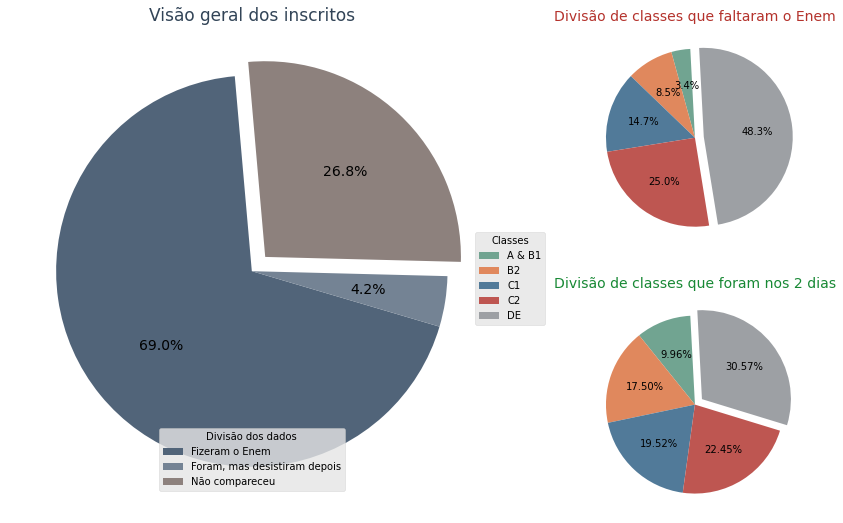

In [29]:
# Cria√ß√£o da figura, cores e defini√ß√£o da sua grade do layout
fig = plt.figure(figsize=(15,9))
specs = gridspec.GridSpec( nrows=2, ncols=3, figure=fig)
colors = ['#516479','#748394','#8D817D']

ax1 = fig.add_subplot( specs[ : , 0:2 ] )
ax2 = fig.add_subplot( specs[ 0 , 2 ] )
ax3 = fig.add_subplot( specs[ 1 , 2 ] )

# Cria√ß√£o das variaveis contendo os respectivos dados para a visualiza√ß√£o e a cria√ß√£o da figura e sua localiza√ß√£o de grade
faltou_tudo = df.loc[ (df["NOTA_LINGUAGENS"].isna()) & (df["NOTA_HUMANAS"].isna()) & (df["NOTA_MATEMATICA"].isna()) & (df["NOTA_NATUREZA"].isna()), ["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"] ].shape[0]
faltou_parcial = df.dropna(how="all", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0] - df.dropna(how="any", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0]
completou = df.dropna(how="any", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0]

ax1.pie([completou, faltou_parcial, faltou_tudo], startangle=95, explode=[0, 0, 0.1], autopct='%.1f%%', colors=colors, textprops={'fontsize': 14});
ax1.legend(['Fizeram o Enem', 'Foram, mas desistiram depois', 'N√£o compareceu'], title = 'Divis√£o dos dados', bbox_to_anchor=(0.7,0.19))
ax1.set_title('Vis√£o geral dos inscritos', fontdict={'fontsize': 17}, color='#324457')

q2 = df.loc[ (df["NOTA_LINGUAGENS"].isna()) & (df["NOTA_HUMANAS"].isna()) & (df["NOTA_MATEMATICA"].isna()) & (df["NOTA_NATUREZA"].isna()), ['INSCRITO', 'CLASSE'] ].groupby('CLASSE').count().reset_index()
q2.loc[ 0 , 'INSCRITO'] = q2.loc[0,'INSCRITO'] + q2.loc[1,'INSCRITO']
q2.loc[ 0 , 'CLASSE'] = 'A & B1'
q2 = q2.drop(axis=1, index=1)
ax2.pie(q2['INSCRITO'], startangle=93, autopct='%.1f%%', explode=[0,0,0,0,0.1], colors=['#71A491', '#E0885D', '#517A99', '#BE5651', '#9DA0A4']); #, pctdistance=0.85
ax2.legend(['A & B1', 'B2', 'C1', 'C2', 'DE'], bbox_to_anchor=(-0.15,0.1), title = 'Classes')
ax2.set_title('Divis√£o de classes que faltaram o Enem', fontdict={'fontsize': 14}, color='#B4322C');
#ax2.axis('equal')

q3 = df.loc[ (df["NOTA_LINGUAGENS"].notna()) & (df["NOTA_HUMANAS"].notna()) & (df["NOTA_MATEMATICA"].notna()) & (df["NOTA_NATUREZA"].notna()), ['INSCRITO', 'CLASSE'] ].groupby('CLASSE').count().reset_index()
q3.loc[ 0 , 'INSCRITO'] = q3.loc[0,'INSCRITO'] + q3.loc[1,'INSCRITO']
q3.loc[ 0 , 'CLASSE'] = 'A & B1'
q3 = q3.drop(axis=1, index=1)
ax3.pie(q3['INSCRITO'], startangle=93, autopct='%.2f%%', explode=[0,0,0,0,0.1], colors=['#71A491', '#E0885D', '#517A99', '#BE5651', '#9DA0A4']);
ax3.set_title('Divis√£o de classes que foram nos 2 dias', fontdict={'fontsize': 14}, color='#188935');

# Salvamento da figura
fig.savefig('integrador01.png', format='png', dpi=125)

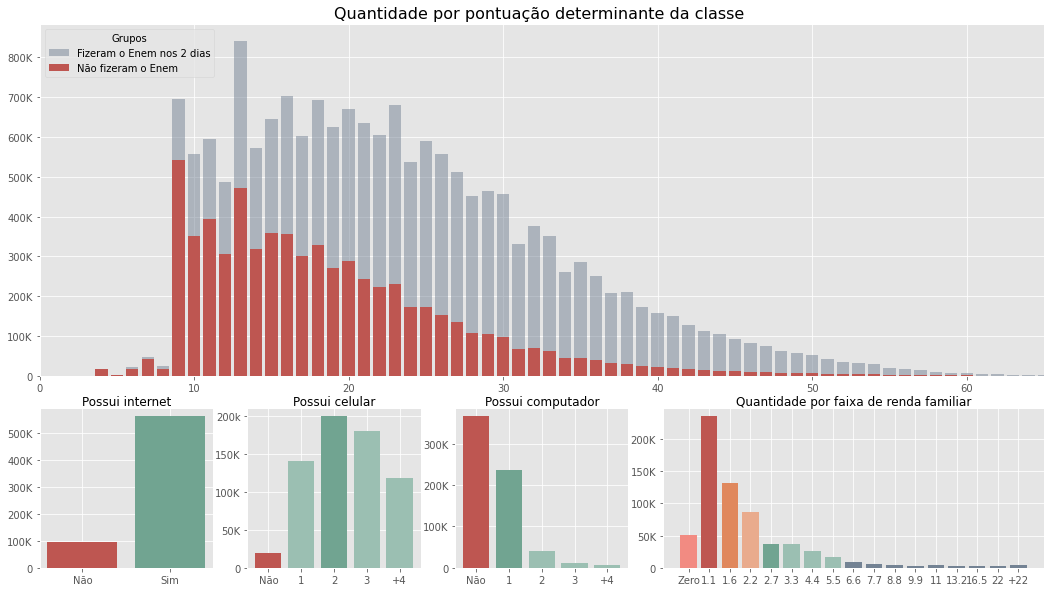

In [34]:
fig = plt.figure(figsize=(18,10))
specs = gridspec.GridSpec( nrows=3, ncols=5, figure=fig)
colors = ['#61764B','#9BA17B','#CFB997', 'FAD6A5', '395144']

ax1 = fig.add_subplot( specs[ :2 , : ] )
ax2 = fig.add_subplot( specs[ 2 , 0 ] )
ax3 = fig.add_subplot( specs[ 2 , 1 ] )
ax4 = fig.add_subplot( specs[ 2 , 2 ] )
ax5 = fig.add_subplot( specs[ 2 , 3: ] )

# ft simboliza falta
ft = df.loc[ (df["NOTA_LINGUAGENS"].isna()) & (df["NOTA_HUMANAS"].isna()) & (df["NOTA_MATEMATICA"].isna()) & (df["NOTA_NATUREZA"].isna()), : ]
# fo simboliza foram
fo = df.loc[ (df["NOTA_LINGUAGENS"].notna()) & (df["NOTA_HUMANAS"].notna()) & (df["NOTA_MATEMATICA"].notna()) & (df["NOTA_NATUREZA"].notna()), : ]

ft_ponts = ft[['INSCRITO', 'PONTOS']].groupby('PONTOS').count().reset_index()
fo_ponts = fo[['INSCRITO', 'PONTOS']].groupby('PONTOS').count().reset_index()
ax1.bar( fo_ponts['PONTOS'], fo_ponts['INSCRITO'], alpha=0.5, color='#748394' )
ax1.bar( ft_ponts['PONTOS'], ft_ponts['INSCRITO'], color='#BE5651' )
ax1.set_title('Quantidade por pontua√ß√£o determinante da classe ', fontdict={'fontsize': 16});
ax1.legend(['Fizeram o Enem nos 2 dias', 'N√£o fizeram o Enem'], loc='upper left', title = 'Grupos')
ax1.set_yticklabels(['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K']);
ax1.set_xlim(0,65)

ft_int = ft[['INSCRITO', 'INTERNET']].groupby('INTERNET').count().reset_index()
ax2.bar( ['N√£o', 'Sim'], ft_int['INSCRITO'], color=['#BE5651', '#71A491'] )
ax2.set_title('Possui internet', fontdict={'fontsize': 12}, y=0.98);
ax2.set_yticklabels(['0', '100K', '200K', '300K', '400K', '500K']);

ft_cel = ft[['INSCRITO', 'CELULAR']].groupby('CELULAR').count().reset_index()
ax3.bar( ['N√£o', '1', '2', '3', '+4'], ft_cel['INSCRITO'], color=['#BE5651', '#9BBFB2', '#71A491', '#9BBFB2', '#9BBFB2'] )
ax3.set_title('Possui celular', fontdict={'fontsize': 12}, y=0.98);
ax3.set_yticklabels(['0', '50K', '100K', '150K', '200k']);

ft_pc = ft[['INSCRITO', 'COMPUTADOR']].groupby('COMPUTADOR').count().reset_index()
ax4.bar( ['N√£o', '1', '2', '3', '+4'], ft_pc['INSCRITO'], color=['#BE5651', '#71A491', '#9BBFB2', '#9BBFB2', '#9BBFB2'] )
ax4.set_title('Possui computador', fontdict={'fontsize': 12}, y=0.98);
ax4.set_yticklabels(['0', '100K', '200K', '300K']);

# rd representa renda
ft_rd = ft[['INSCRITO', 'RENDA_FAMIL']].groupby('RENDA_FAMIL').count().reset_index()
ft_rd['RENDA_FAMIL'] = ft_rd['RENDA_FAMIL'].apply( lambda x: str(x))
ax5.bar( ft_rd['RENDA_FAMIL'], ft_rd['INSCRITO'], color=['#F28B82', '#BE5651', '#E0885D', '#E9AB8D', '#71A491', '#9BBFB2', '#9BBFB2', '#9BBFB2', '#748394', '#748394', '#748394', '#748394', '#748394', '#748394', '#748394', '#748394', '#748394'] )
ax5.set_title('Quantidade por faixa de renda familiar', fontdict={'fontsize': 12}, y=0.98);
ax5.set_xticklabels(['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '+22']);
ax5.set_yticklabels(['0', '50K', '100K', '150K', '200K']);
fig.savefig('integrador02.png', format='png', dpi=125)

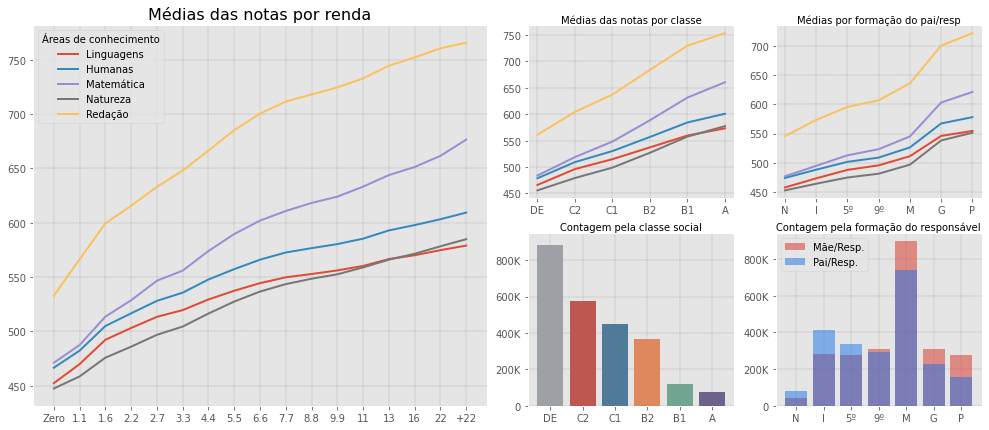

In [35]:
fig = plt.figure(figsize=(17,7))
specs = gridspec.GridSpec( nrows=2, ncols=4, figure=fig)

ax1 = fig.add_subplot( specs[ : , 0:2 ] )
ax2 = fig.add_subplot( specs[ 0 , 2 ] )
ax3 = fig.add_subplot( specs[ 0 , 3 ] )
ax4 = fig.add_subplot( specs[ 1 , 2 ] )
ax5 = fig.add_subplot( specs[ 1 , 3 ] )

q1 = ds[['PONTOS', 'RENDA_FAMIL', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('RENDA_FAMIL').mean().reset_index().sort_values('RENDA_FAMIL')
q1['RENDA_FAMIL'] = q1['RENDA_FAMIL'].apply(lambda x: str(x))
ax1.plot( ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13', '16', '22', '+22'], q1[['NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC']], linewidth = 2 );
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.legend(['Linguagens', 'Humanas', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='upper left', title = '√Åreas de conhecimento')
ax1.set_title('M√©dias das notas por renda', fontdict={'fontsize': 16});

q2 = ds[['PONTOS', 'CLASSE', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('CLASSE').mean().reset_index().sort_values('CLASSE', ascending=False)
ax2.plot( q2['CLASSE'], q2[['NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC']], linewidth = 2 );
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax2.set_title('M√©dias das notas por classe', fontdict={'fontsize': 10}, y=0.98);

q3 = ds[['PONTOS', 'CLASSE', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('FORMACAO_PAI_RPSV').mean().reset_index()
q3['SORT'] = [3,4,6,7,5,0,2,1]
q3 = q3.sort_values('SORT')
q3 = q3.drop(axis=1, index=7)
ax3.plot( ['N', 'I', '5¬∫', '9¬∫', 'M', 'G', 'P'], q3[['NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC']], linewidth = 2 );
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax3.set_title('M√©dias por forma√ß√£o do pai/resp', fontdict={'fontsize': 10}, y=0.98);

q4 = ds[['PONTOS', 'CLASSE', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('CLASSE').count().reset_index().sort_values('CLASSE', ascending=False)
ax4.bar( q4['CLASSE'], q4['PONTOS'], color=['#9DA0A4', '#BE5651', '#517A99', '#E0885D', '#71A491', '#6d628a'] );
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax4.set_title('Contagem pela classe social', fontdict={'fontsize': 10}, y=0.98);
ax4.set_ylim(0,950000)
ax4.set_yticklabels(['0', '200K', '400K', '600K', '800K']);

q5 = ds[['PONTOS', 'CLASSE', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('FORMACAO_PAI_RPSV').count().reset_index()
q5_1 = ds[['PONTOS', 'CLASSE', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('FORMACAO_MAE_RPSV').count().reset_index()
q5['SORT'] = [3,4,6,7,5,0,2,1]
q5 = q5.sort_values('SORT')
q5 = q5.drop(axis=1, index=7)
q5_1['SORT'] = [3,4,6,7,5,0,2,1]
q5_1 = q5_1.sort_values('SORT')
q5_1 = q5_1.drop(axis=1, index=7)
ax5.bar( ['N', 'I', '5¬∫', '9¬∫', 'M', 'G', 'P'], q5_1['PONTOS'], alpha=0.5, color='#D93025');
ax5.bar( ['N', 'I', '5¬∫', '9¬∫', 'M', 'G', 'P'], q5['PONTOS'], alpha=0.5, color='#1A73E8');
ax5.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax5.set_title('Contagem pela forma√ß√£o do respons√°vel', fontdict={'fontsize': 10}, y=0.98)
#ax5.set_yticklabels(['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K']);
ax5.legend(['M√£e/Resp.', 'Pai/Resp.'], loc='upper left')
ax5.set_yticklabels(['0', '200K', '400K', '600K', '800K']);
fig.savefig('integrador03.png', format='png', dpi=125)

In [ ]:
df['FORMACAO_PAI_RPSV'].unique()

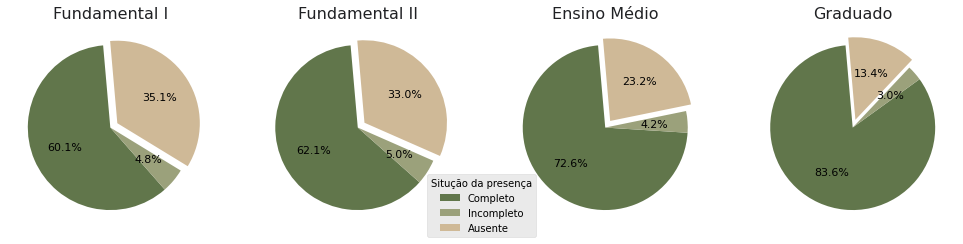

In [36]:
fig = plt.figure(figsize=(17,7))
specs = gridspec.GridSpec( nrows=1, ncols=4, figure=fig)

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 0 , 1 ] )
ax3 = fig.add_subplot( specs[ 0 , 2 ] )
ax4 = fig.add_subplot( specs[ 0 , 3 ] )


# Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental
resp2 = df.loc[ (df['FORMACAO_PAI_RPSV'] == 'Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental') & (df['FORMACAO_MAE_RPSV'] == 'Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental'), :]
fund1_flt = resp2.loc[(resp2['PRESENCA_LINGUAGENS'] == 'Faltou √† prova') & (resp2['PRESENCA_HUMANAS'] == 'Faltou √† prova') & (resp2['PRESENCA_MATEMATICA'] == 'Faltou √† prova') & (resp2['PRESENCA_NATUREZA'] == 'Faltou √† prova'), :]
fund1_foi = resp2.loc[(resp2['PRESENCA_LINGUAGENS'] == 'Presente na prova') & (resp2['PRESENCA_HUMANAS'] == 'Presente na prova') & (resp2['PRESENCA_MATEMATICA'] == 'Presente na prova') & (resp2['PRESENCA_NATUREZA'] == 'Presente na prova'), :]

ax1.pie( [fund1_foi.shape[0], resp2.shape[0] - (fund1_flt.shape[0] + fund1_foi.shape[0]), fund1_flt.shape[0] ], explode=[0, 0, 0.1], autopct='%.1f%%', colors=colors, textprops={'fontsize': 11}, startangle=95 )
ax1.set_title('Fundamental I', fontdict={'fontsize': 16}, color='#202124');

# Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio
resp3 = df.loc[ (df['FORMACAO_PAI_RPSV'] == 'Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio') & (df['FORMACAO_MAE_RPSV'] == 'Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio'), :]
fund2_flt = resp3.loc[(resp3['PRESENCA_LINGUAGENS'] == 'Faltou √† prova') & (resp3['PRESENCA_HUMANAS'] == 'Faltou √† prova') & (resp3['PRESENCA_MATEMATICA'] == 'Faltou √† prova') & (resp3['PRESENCA_NATUREZA'] == 'Faltou √† prova'), :]
fund2_foi = resp3.loc[(resp3['PRESENCA_LINGUAGENS'] == 'Presente na prova') & (resp3['PRESENCA_HUMANAS'] == 'Presente na prova') & (resp3['PRESENCA_MATEMATICA'] == 'Presente na prova') & (resp3['PRESENCA_NATUREZA'] == 'Presente na prova'), :]

ax2.pie( [fund2_foi.shape[0], resp3.shape[0] - (fund2_flt.shape[0] + fund2_foi.shape[0]), fund2_flt.shape[0] ], explode=[0, 0, 0.1], autopct='%.1f%%', colors=colors, textprops={'fontsize': 11}, startangle=95 )
ax2.set_title('Fundamental II', fontdict={'fontsize': 16}, color='#202124');
ax2.legend(['Completo', 'Incompleto', 'Ausente'], bbox_to_anchor=(0.81,0.3),  title='Situ√ß√£o da presen√ßa')

# Completou o Ensino M√©dio, mas n√£o completou a Faculdade
resp4 = df.loc[ (df['FORMACAO_PAI_RPSV'] == 'Completou o Ensino M√©dio, mas n√£o completou a Faculdade') & (df['FORMACAO_MAE_RPSV'] == 'Completou o Ensino M√©dio, mas n√£o completou a Faculdade'), :]
medio_flt = resp4.loc[(resp4['PRESENCA_LINGUAGENS'] == 'Faltou √† prova') & (resp4['PRESENCA_HUMANAS'] == 'Faltou √† prova') & (resp4['PRESENCA_MATEMATICA'] == 'Faltou √† prova') & (resp4['PRESENCA_NATUREZA'] == 'Faltou √† prova'), :]
medio_foi = resp4.loc[(resp4['PRESENCA_LINGUAGENS'] == 'Presente na prova') & (resp4['PRESENCA_HUMANAS'] == 'Presente na prova') & (resp4['PRESENCA_MATEMATICA'] == 'Presente na prova') & (resp4['PRESENCA_NATUREZA'] == 'Presente na prova'), :]

ax3.pie( [medio_foi.shape[0], resp4.shape[0] - (medio_flt.shape[0] + medio_foi.shape[0]), medio_flt.shape[0] ], explode=[0, 0, 0.1], autopct='%.1f%%', colors=colors, textprops={'fontsize': 11}, startangle=95 )
ax3.set_title('Ensino M√©dio', fontdict={'fontsize': 16}, color='#202124');

# Completou o Ensino M√©dio, mas n√£o completou a Faculdade
resp5 = df.loc[ (df['FORMACAO_PAI_RPSV'] == 'Completou a Faculdade, mas n√£o completou a P√≥s-gradua√ß√£o') & (df['FORMACAO_MAE_RPSV'] == 'Completou a Faculdade, mas n√£o completou a P√≥s-gradua√ß√£o'), :]
grad_flt = resp5.loc[(resp5['PRESENCA_LINGUAGENS'] == 'Faltou √† prova') & (resp5['PRESENCA_HUMANAS'] == 'Faltou √† prova') & (resp5['PRESENCA_MATEMATICA'] == 'Faltou √† prova') & (resp5['PRESENCA_NATUREZA'] == 'Faltou √† prova'), :]
grad_foi = resp5.loc[(resp5['PRESENCA_LINGUAGENS'] == 'Presente na prova') & (resp5['PRESENCA_HUMANAS'] == 'Presente na prova') & (resp5['PRESENCA_MATEMATICA'] == 'Presente na prova') & (resp5['PRESENCA_NATUREZA'] == 'Presente na prova'), :]

ax4.pie( [grad_foi.shape[0], resp5.shape[0] - (grad_flt.shape[0] + grad_foi.shape[0]), grad_flt.shape[0] ], explode=[0, 0, 0.1], autopct='%.1f%%', colors=colors, textprops={'fontsize': 11}, startangle=95 )
ax4.set_title('Graduado', fontdict={'fontsize': 16}, color='#202124');
fig.savefig('integrador04.png', format='png', dpi=125)

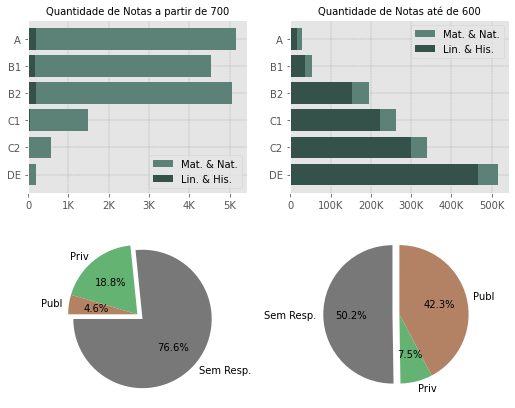

In [17]:
fig = plt.figure(figsize=(18,7))
specs = gridspec.GridSpec( nrows=2, ncols=4, figure=fig)

nota_abaixo = 600
nota_apartir = 750

ax2 = fig.add_subplot( specs[ 0 , 2 ] )
ax3 = fig.add_subplot( specs[ 0 , 3 ] )
ax4 = fig.add_subplot( specs[ 1 , 2 ] )
ax5 = fig.add_subplot( specs[ 1 , 3 ] )

q1 = ds

q2 = ds.loc[ (df['NOTA_MATEMATICA'] >= nota_apartir ) & (df['NOTA_NATUREZA'] >= nota_apartir), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q2 = q2.groupby('CLASSE').count().reset_index().sort_values('CLASSE', ascending=False)
q2_1 = ds.loc[ (df['NOTA_LINGUAGENS'] >= nota_apartir ) & (df['NOTA_HUMANAS'] >= nota_apartir), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q2_1 = q2_1.groupby('CLASSE').count().reset_index().sort_values('CLASSE', ascending=False)
ax2.barh( q2['CLASSE'] , q2['TIPO_ESC'], color='#5c8278')
ax2.barh( q2_1['CLASSE'] , q2_1['TIPO_ESC'], color='#35524a')
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax2.set_xticklabels(['0', '1K', '2K', '3K', '4K', '5K', '6K']);
ax2.set_title('Quantidade de Notas a partir de 700', fontdict={'fontsize': 10});
ax2.legend(['Mat. & Nat.', 'Lin. & His.'], loc='lower right')

q3 = ds.loc[ (df['NOTA_MATEMATICA'] <= nota_abaixo ) & (df['NOTA_NATUREZA'] <= nota_abaixo), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q3 = q3.groupby('CLASSE').count().reset_index().sort_values('CLASSE', ascending=False)
q3_1 = ds.loc[ (df['NOTA_LINGUAGENS'] <= nota_abaixo ) & (df['NOTA_HUMANAS'] <= nota_abaixo), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q3_1 = q3_1.groupby('CLASSE').count().reset_index().sort_values('CLASSE', ascending=False)
ax3.barh( q3_1['CLASSE'] , q3_1['TIPO_ESC'], color='#5c8278')
ax3.barh( q3['CLASSE'] , q3['TIPO_ESC'], color='#35524a')
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax3.set_xticklabels(['0', '100K', '200K', '300K', '400K', '500K']);
ax3.set_title('Quantidade de Notas at√© de 600', fontdict={'fontsize': 10});
ax3.legend(['Mat. & Nat.', 'Lin. & His.'], loc='upper right');

q4 = ds.loc[ (df['NOTA_MATEMATICA'] >= nota_apartir ) & (df['NOTA_NATUREZA'] >= nota_apartir), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q4 = q4.groupby('TIPO_ESC').count()
ax4.pie(q4['CLASSE'], colors=['#787878', '#64b372', '#b38264'], labels=['Sem Resp.', 'Priv', 'Publ'], startangle=180, explode=[0.1, 0, 0], autopct='%.1f%%');

q5 = ds.loc[ (df['NOTA_LINGUAGENS'] <= nota_abaixo ) & (df['NOTA_HUMANAS'] <= nota_abaixo), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q5 = q5.groupby('TIPO_ESC').count()
ax5.pie(q5['CLASSE'], colors=['#787878', '#64b372', '#b38264'], labels=['Sem Resp.', 'Priv', 'Publ'], startangle=90, explode=[0.1, 0, 0], autopct='%.1f%%');
fig.savefig('foo.png')

fig.savefig('integrador05.png', format='png', dpi=125)

In [ ]:
df.groupby('')

# C√©lulas Arquivadas
### As c√©lulas abaixo utilizam os mesmos dados, por√©m, tratados de uma maneira diferente
### Para n√£o haver problemas com colunas e valores, trates os dados brutos, n√£o use os dados j√° tratados

## **Execu√ß√£ de An√°lise Anteriores**
* Podem conter erros e problemas pois algumas n√£o foram terminas
* Arquivamentos da an√°lise anterior

In [ ]:
ques14

In [ ]:
#### Cria√ß√£o desses grupos para An√°lise

#### Dados dos Individuos que Faltaram algum dia ####

falt_alg = df.loc[ (df["NU_NOTA_CH"].isna()) | (df["NU_NOTA_LC"].isna()) | (df["NU_NOTA_MT"].isna()) | (df["NU_NOTA_CN"].isna()), : ].dropna(how="all", subset=["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_CN"]).reset_index(drop=True)
#falt_alg.to_csv('FaltaramAlgumDia.csv', sep=';', encoding='latin-1')

#### Dados dos Individuos que n√£o fizeram o Enem ####

falt_tudo = df.loc[ (df["NU_NOTA_CH"].isna()) & (df["NU_NOTA_LC"].isna()) & (df["NU_NOTA_MT"].isna()) & (df["NU_NOTA_CN"].isna()), : ].reset_index(drop=True)
#falt_tudo.to_csv('FaltaramTudo.csv', sep=';', encoding='latin-1')

#### Completaram todo o Enem ####

completo = df.dropna(how="any", subset=["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_CN"]).reset_index(drop=True)
#completo.to_csv('FaltaramTudo.csv', sep=';', encoding='latin-1')

In [ ]:
### O Pai que nunca aestudou, qual a quantidade de pessoas que tiraram uma nota boa e qual a situa√ß√£o delas?
que1 = df.loc[(df['NU_NOTA_CH'] >= 700) & (df['NU_NOTA_LC'] >= 700) & (df['NU_NOTA_MT'] >= 700) & (df['NU_NOTA_CN'] >= 700), ['Q006', 'Q001']].groupby('Q001').count().reset_index()
que1['Sort'] = [4,5,4,8,6,1,3,2]
que1 = que1.sort_values('Sort').reset_index(drop=True)


plt.bar( ['Nunca', 'N√£o Sabe', 'Incomp. I', 'Fund. I', 'Fund. II', 'M√©dio', 'Graduado', 'PosGrad.' ], ques['Q006'] )
plt.grid(color = 'grey', linewidth = 0.3)
plt.title('Contagem de Boas Notas por Grau de Forma√ß√£o do Pai')

In [ ]:
display(df.loc[(df['Q001'] == 'Nunca estudou') & (df['NU_NOTA_CH'] >= 700) & (df['NU_NOTA_LC'] >= 700) & (df['NU_NOTA_MT'] >= 700) & (df['NU_NOTA_CN'] >= 700), ['Q006', 'Q001', 'Q002', 'NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'Q005']])

In [ ]:
'''
### An√°lise dos Individuos com boas Notas | Acima de 700
* Vemos que a minoria que adquiri um anota suficientemente boa para entrar
na faculdade √© por grande parte dos inscritos que possuem uma renda superior
a 3.300 RS, uma renda baixa, mas suficiente somente para suas necessidades b√°sicas'''

boas = df.loc[ (df['NU_NOTA_REDACAO'] >= 700) & (df['NU_NOTA_CH'] >= 700) & (df['NU_NOTA_LC'] >= 700) & (df['NU_NOTA_MT'] >= 700) & (df['NU_NOTA_CN'] >= 700), : ]
ruins = df.loc[ (df['NU_NOTA_REDACAO'] <= 450) & (df['NU_NOTA_CH'] <= 450) & (df['NU_NOTA_LC'] <= 450) & (df['NU_NOTA_MT'] <= 450) & (df['NU_NOTA_CN'] <= 450), : ]

grau_pai = df[['Q001','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby('Q001').mean().reset_index().sort_values('Q001')
grau_pai['Sort'] = ['D', 'E', 'G', 'H', 'F', 'A', 'C', 'B']
grau_pai = grau_pai.sort_values('Sort')
grau_x = ['Nunca', 'N√£o Sabe', 'Incomp. I', 'Fund. I', 'Fund. II', 'M√©dio', 'Graduado', 'PosGrad.' ]
grau_leg = ['Reda√ß√£o', 'Humanas', 'Linguagens', 'Matem√°tica', 'Natureza']

boas1 = boas[['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby('Q006').count().reset_index()
boas1['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
boas1 = boas1.sort_values('Sort')

ruins1 = ruins[['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby('Q006').count().reset_index()
ruins1['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
ruins1 = ruins1.sort_values('Sort')

todos = df[['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby('Q006').count().reset_index()
todos['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
todos = todos.sort_values('Sort')

fig = plt.figure(figsize=(18,11))
specs = gridspec.GridSpec( nrows=3, ncols=3, figure=fig)

ax1 = fig.add_subplot( specs[ :2 , 0:2 ] )
ax2 = fig.add_subplot( specs[ 0 , 2 ] )
ax3 = fig.add_subplot( specs[ 1 , 2 ] )
ax4 = fig.add_subplot( specs[ 2 , 0 ] )
ax5 = fig.add_subplot( specs[ 2 , 1 ] )
ax6 = fig.add_subplot( specs[ 2 , 2 ] )

ax1.plot(grau_x, grau_pai[['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']], linewidth = 2)
ax1.legend(grau_leg, loc='upper left')
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title('M√©dias das Notas por Forma√ß√£o do Pai')

ax2.bar( label, boas1['NU_NOTA_REDACAO'], color='springgreen' )
ax2.grid(color = 'grey', linewidth = 0.3)
ax2.set_title('Notas de Totas as Mat√©rias acima de 700')
ax2.legend(grau_leg, loc='upper left')


ax3.bar( label, ruins1['NU_NOTA_REDACAO'], color='salmon' )
ax3.grid(color = 'grey', linewidth = 0.3)
ax3.set_title('Notas Totas as Mat√©rias abaixo de 450')

In [ ]:
'''
### Analise dos Inscritos sem Renda
Quantidade de Inscritos sem Renda: 143246 (5.8% do total)
* Ao analisar a frequencia de inscritos pelo crit√©rio de separa√ß√£o pela sua nota pela sua renda, vemos que 
'''

sren = df.loc[ df['Q006'] == 'Nenhuma Renda', :].reset_index(drop=True)
display(sren.loc[ (sren['Q001'] == 'Nunca estudou') & (sren['Q002'] == 'Nunca estudou'), ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ] )

In [ ]:
### Grau de Forma√ß√£o do Pai em Rela√ß√£o a Nota do Participante
q1 = df[['Q001','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby('Q001').mean().reset_index().sort_values('Q001')
q1['Sort'] = ['D', 'E', 'G', 'H', 'F', 'A', 'C', 'B']
q1 = q1.sort_values('Sort')
q1_label = ['Nunca', 'N√£o Sabe', 'Incomp. I', 'Fund. I', 'Fund. II', 'M√©dio', 'Graduado', 'PosGrad.' ]
q1_mat = ['Reda√ß√£o', 'Humanas', 'Linguagens', 'Matem√°tica', 'Natureza']
q1_group = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'N√£o sei']

q2 = df[['Q001', 'NU_NOTA_CN']].groupby('Q001').count().reset_index().sort_values('Q001')
q2['Sort'] = ['D', 'E', 'G', 'H', 'F', 'A', 'C', 'B']
q2 = q2.sort_values('Sort')
q2[['Q001', 'NU_NOTA_CN']]

q6 = df[['Q001', 'Q003', 'NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby(['Q001', 'Q003']).mean().reset_index()

fig = plt.figure( figsize=(40,13) )
specs = gridspec.GridSpec( nrows=4 , ncols=8 , figure=fig )

ax1 = fig.add_subplot( specs[ :2 , 0:2 ] )

ax2 = fig.add_subplot( specs[ 0 , 2 ] )
ax3 = fig.add_subplot( specs[ 0 , 3 ] )
ax4 = fig.add_subplot( specs[ 1 , 2 ] )
ax5 = fig.add_subplot( specs[ 1 , 3 ] )

ax6 = fig.add_subplot( specs[ 2 , 0 ] )
ax7 = fig.add_subplot( specs[ 2 , 1 ] )
ax8 = fig.add_subplot( specs[ 2 , 2 ] )
ax9 = fig.add_subplot( specs[ 2 , 3 ] )
ax10 = fig.add_subplot( specs[ 3 , 0 ] )
ax11 = fig.add_subplot( specs[ 3 , 1 ] )
ax12 = fig.add_subplot( specs[ 3 , 2 ] )
ax13 = fig.add_subplot( specs[ 3 , 3 ] )

ax1.plot(q1_label, q1[['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']], linewidth = 2)
ax1.legend(q1_mat, loc='upper left')
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title('M√©dias das Notas por Forma√ß√£o do Pai')

ax2.figsize=(10,10)
ax2.pie( q2['NU_NOTA_CN'], autopct='%.0f%%', labeldistance=1.2 )
ax2.legend(labels=q1_label, loc='upper left', bbox_to_anchor=(-0.5,1))

ax6.plot( q1_group, q6.loc[ :5, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax6.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax6.set_title(q1_group[0])

ax7.plot( q1_group, q6.loc[ 6:11, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax7.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax7.set_title(q1_group[1])

ax8.plot( q1_group, q6.loc[ 12:17, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax8.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax8.set_title(q1_group[2])

ax9.plot( q1_group, q6.loc[ 18:23, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax9.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax9.set_title(q1_group[3])

ax10.plot( q1_group, q6.loc[ 24:29, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax10.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax10.set_title(q1_group[4])

ax11.plot( q1_group, q6.loc[ 30:35, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax11.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax11.set_title(q1_group[5])

ax12.plot( q1_group, q6.loc[ 36:41, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax12.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax12.set_title(q1_group[6])

ax13.plot( q1_group, q6.loc[ 42:, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax13.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax13.set_title(q1_group[7])

In [ ]:
q1 = df[['Q001', 'Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].sort_values(['Q001', 'Q006'])

q1a = q1.loc[ q1['Q001'] == 'N√£o sei' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1a['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1a = q1a.sort_values('Sort')

q1b = q1.loc[ q1['Q001'] == 'Nunca estudou' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1b['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1b = q1b.sort_values('Sort')

q1c = q1.loc[ q1['Q001'] == 'N√£o completou a 4¬™ s√©rie/5¬∫ ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1c['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1c = q1c.sort_values('Sort')

q1d = q1.loc[ q1['Q001'] == 'Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1d['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1d = q1d.sort_values('Sort')

q1e = q1.loc[ q1['Q001'] == 'Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1e['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1e = q1e.sort_values('Sort')

q1f = q1.loc[ q1['Q001'] == 'Completou o Ensino M√©dio, mas n√£o completou a Faculdade' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1f['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1f = q1f.sort_values('Sort')

q1g = q1.loc[ q1['Q001'] == 'Completou a Faculdade, mas n√£o completou a P√≥s-gradua√ß√£o' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1g['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1g = q1g.sort_values('Sort')

q1h = q1.loc[ q1['Q001'] == 'Completou a P√≥s-gradua√ß√£o' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1h['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1h = q1h.sort_values('Sort')


In [ ]:
### Separa√ß√£o do Tipo de Escola em rela√ß√£o a M√©dia das Nota
label = ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '> 22' ]
com = completo[['TP_ESCOLA', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'Q006']].groupby(['TP_ESCOLA', 'Q006']).mean().reset_index()

nores = com.loc[ :16 , : ]
priva = com.loc[ 17:33 , : ]
publi = com.loc[ 34:50 , : ]

nores['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
priva['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
publi['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']

nores = nores.sort_values('Sort')
priva = priva.sort_values('Sort')
publi = publi.sort_values('Sort')

fig = plt.figure( figsize=(20,4) )
specs = gridspec.GridSpec( nrows=1 , ncols=3 , figure=fig )

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 0 , 1 ] )
ax3 = fig.add_subplot( specs[ 0 , 2 ] )

ax1.plot( label , nores[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] )
ax1.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title(nores['TP_ESCOLA'].unique()[0])
ax1.set_ylim(400,850)

ax2.plot( label , priva[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] )
ax2.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax2.set_title(priva['TP_ESCOLA'].unique()[0])
ax2.set_ylim(400,850)

ax3.plot( label , publi[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] )
ax3.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax3.set_title(publi['TP_ESCOLA'].unique()[0])
ax3.set_ylim(400,850);

In [ ]:
a = df[['NU_INSCRICAO', 'Q006']].groupby('Q006').count()
a['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
a = a.sort_values('Sort').reset_index()
plt.figure( figsize=(10,10) )

plt.pie(a['NU_INSCRICAO'], labels=label);

In [ ]:
### Forma√ß√£o do Pai

q1 = df[['Q001', 'Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].sort_values('Q001')
q1a = q1.loc[ q1['Q001'] == 'N√£o sei' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1b = q1.loc[ q1['Q001'] == 'Nunca estudou' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1c = q1.loc[ q1['Q001'] == 'N√£o completou a 4¬™ s√©rie/5¬∫ ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1d = q1.loc[ q1['Q001'] == 'Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1e = q1.loc[ q1['Q001'] == 'Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1f = q1.loc[ q1['Q001'] == 'Completou o Ensino M√©dio, mas n√£o completou a Faculdade' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1g = q1.loc[ q1['Q001'] == 'Completou a Faculdade, mas n√£o completou a P√≥s-gradua√ß√£o' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1h = q1.loc[ q1['Q001'] == 'Completou a P√≥s-gradua√ß√£o' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()

In [ ]:
label = ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '> 22' ]
plt.figure( figsize=(18,9) )

q1 = df[['Q001', 'Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].sort_values('Q001')
q1a = q1.loc[ q1['Q001'] == 'N√£o sei' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1b = q1.loc[ q1['Q001'] == 'Nunca estudou' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1c = q1.loc[ q1['Q001'] == 'N√£o completou a 4¬™ s√©rie/5¬∫ ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1d = q1.loc[ q1['Q001'] == 'Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1e = q1.loc[ q1['Q001'] == 'Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1f = q1.loc[ q1['Q001'] == 'Completou o Ensino M√©dio, mas n√£o completou a Faculdade' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1g = q1.loc[ q1['Q001'] == 'Completou a Faculdade, mas n√£o completou a P√≥s-gradua√ß√£o' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1h = q1.loc[ q1['Q001'] == 'Completou a P√≥s-gradua√ß√£o' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()

q1a['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1b['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1c['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1d['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1e['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1f['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1g['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1h['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
    
q1a['MEDIA'] = (q1a['NU_NOTA_REDACAO'] + q1a['NU_NOTA_CH'] + q1a['NU_NOTA_LC'] + q1a['NU_NOTA_MT'] + q1a['NU_NOTA_CN']) / 5
q1b['MEDIA'] = (q1b['NU_NOTA_REDACAO'] + q1b['NU_NOTA_CH'] + q1b['NU_NOTA_LC'] + q1b['NU_NOTA_MT'] + q1b['NU_NOTA_CN']) / 5
q1c['MEDIA'] = (q1c['NU_NOTA_REDACAO'] + q1c['NU_NOTA_CH'] + q1c['NU_NOTA_LC'] + q1c['NU_NOTA_MT'] + q1c['NU_NOTA_CN']) / 5
q1d['MEDIA'] = (q1d['NU_NOTA_REDACAO'] + q1d['NU_NOTA_CH'] + q1d['NU_NOTA_LC'] + q1d['NU_NOTA_MT'] + q1d['NU_NOTA_CN']) / 5
q1e['MEDIA'] = (q1e['NU_NOTA_REDACAO'] + q1e['NU_NOTA_CH'] + q1e['NU_NOTA_LC'] + q1e['NU_NOTA_MT'] + q1e['NU_NOTA_CN']) / 5
q1f['MEDIA'] = (q1f['NU_NOTA_REDACAO'] + q1f['NU_NOTA_CH'] + q1f['NU_NOTA_LC'] + q1f['NU_NOTA_MT'] + q1f['NU_NOTA_CN']) / 5
q1g['MEDIA'] = (q1g['NU_NOTA_REDACAO'] + q1g['NU_NOTA_CH'] + q1g['NU_NOTA_LC'] + q1g['NU_NOTA_MT'] + q1g['NU_NOTA_CN']) / 5
q1h['MEDIA'] = (q1h['NU_NOTA_REDACAO'] + q1h['NU_NOTA_CH'] + q1h['NU_NOTA_LC'] + q1h['NU_NOTA_MT'] + q1h['NU_NOTA_CN']) / 5

q1a = q1a.sort_values('Sort')
q1b = q1b.sort_values('Sort')
q1c = q1c.sort_values('Sort')
q1d = q1d.sort_values('Sort')
q1e = q1e.sort_values('Sort')
q1f = q1f.sort_values('Sort')
q1g = q1g.sort_values('Sort')
q1h = q1h.sort_values('Sort')

plt.plot( label, q1a['MEDIA'] )
plt.plot( label, q1b['MEDIA'] )
plt.plot( label, q1c['MEDIA'] )
plt.plot( label, q1d['MEDIA'] )
plt.plot( label, q1e['MEDIA'] )
plt.plot( label, q1f['MEDIA'] )
plt.plot( label, q1g['MEDIA'] )
plt.plot( label, q1h['MEDIA'] )

legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right')

In [ ]:
### Crescimento das M√©dias em rela√ß√£o a Faixa de Renda | Faixa Et√°ria

label = ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '> 22' ]
df2 = df[['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'Q006']].dropna(how='all', subset=['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'])

fe1 = df2.loc[(df2['TP_FAIXA_ETARIA'] == '17 anos') | (df2['TP_FAIXA_ETARIA'] == '18 anos') | (df2['TP_FAIXA_ETARIA'] == '19 anos'), ['Q006', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'] ].groupby('Q006').mean().reset_index()
fe2 = df2.loc[(df2['TP_FAIXA_ETARIA'] == '20 anos') | (df2['TP_FAIXA_ETARIA'] == '21 anos') | (df2['TP_FAIXA_ETARIA'] == '22 anos'), ['Q006', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'] ].groupby('Q006').mean().reset_index()
fe3 = df2.loc[(df2['TP_FAIXA_ETARIA'] == '23 anos') | (df2['TP_FAIXA_ETARIA'] == '24 anos') | (df2['TP_FAIXA_ETARIA'] == '25 anos'), ['Q006', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'] ].groupby('Q006').mean().reset_index()
fe4 = df2.loc[: , ['Q006', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'] ].groupby('Q006').mean().reset_index()

# Serve para ordenar os valores
fe1['Renda'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe2['Renda'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe3['Renda'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe4['Renda'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']

fe1 = fe1.sort_values('Renda')
fe2 = fe2.sort_values('Renda')
fe3 = fe3.sort_values('Renda')
fe4 = fe4.sort_values('Renda')

fig = plt.figure( figsize=(20,10) )
specs = gridspec.GridSpec( nrows=2 , ncols=2 , figure=fig )

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 0 , 1 ] )
ax3 = fig.add_subplot( specs[ 1 , 0 ] )
ax4 = fig.add_subplot( specs[ 1 , 1 ] )

ax1.plot( label, fe1[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] );
ax1.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title("17, 18 e 19 anos")
ax1.set_ylim(400,850)

ax2.plot( label, fe2[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] );
ax2.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3);
ax2.set_title("20, 21 e 22 anos")
ax2.set_ylim(400,850)

ax3.plot( label, fe3[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] );
ax3.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3);
ax3.set_title("23, 24 e 25 anos")
ax3.set_ylim(400,850)

ax4.plot( label, fe4[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] );
ax4.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.3);
ax4.set_title("Todos os inscritos")
ax4.set_ylim(400,850);


In [ ]:
for col in ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']:
    df2 = df[['NU_INSCRICAO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', col]].groupby(col).mean().reset_index()
    plt.plot( list(df2[col].unique()), df2[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] )
    plt.title(col)
    plt.xticks(rotation = -90)
    plt.yticks(rotation = 0)
    plt.show()

In [ ]:
### Forma√ß√£o | Pai
#### At√© que s√©rie seu pai, ou o homem respons√°vel por voc√™, estudou?

df2 = df[['TP_FAIXA_ETARIA', 'TP_SEXO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'Q001', 'Q006']].groupby(['Q001', 'Q006']).mean().reset_index()
df2.columns = ['Condi√ß√£o_Pai', 'Renda', 'Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']
label = ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '> 22' ]

fe1 = df2.loc[:16 , :]
fe2 = df2.loc[17:33 , :]
fe3 = df2.loc[34:50 , :]
fe4 = df2.loc[51:67 , :]
fe5 = df2.loc[68:84 , :]
fe6 = df2.loc[85:101 , :]
fe7 = df2.loc[102:118 , :]
fe8 = df2.loc[119:135 , :]

# Serve para ordenar os valores
fe1['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe2['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe3['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe4['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe5['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe6['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe7['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe8['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']

fe1 = fe1.sort_values('Sort').reset_index(drop=True)
fe2 = fe2.sort_values('Sort').reset_index(drop=True)
fe3 = fe3.sort_values('Sort').reset_index(drop=True)
fe4 = fe4.sort_values('Sort').reset_index(drop=True)
fe5 = fe5.sort_values('Sort').reset_index(drop=True)
fe6 = fe6.sort_values('Sort').reset_index(drop=True)
fe7 = fe7.sort_values('Sort').reset_index(drop=True)
fe8 = fe8.sort_values('Sort').reset_index(drop=True)

fig = plt.figure( figsize=(22,33) )
specs = gridspec.GridSpec( nrows=4 , ncols=2 , figure=fig )

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 1 , 0 ] )
ax3 = fig.add_subplot( specs[ 2 , 0 ] )
ax4 = fig.add_subplot( specs[ 3 , 0 ] )
ax5 = fig.add_subplot( specs[ 0 , 1 ] )
ax6 = fig.add_subplot( specs[ 1 , 1 ] )
ax7 = fig.add_subplot( specs[ 2 , 1 ] )
ax8 = fig.add_subplot( specs[ 3 , 1 ] )

ax1.plot( label , fe1[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax1.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title(fe1['Condi√ß√£o_Pai'].unique()[0])
ax1.set_ylim(430,800)

ax2.plot( label , fe2[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax2.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax2.set_title(fe2['Condi√ß√£o_Pai'].unique()[0])
ax2.set_ylim(430,800)

ax3.plot( label , fe3[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax3.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax3.set_title(fe3['Condi√ß√£o_Pai'].unique()[0])
ax3.set_ylim(430,800)

ax4.plot( label , fe4[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax4.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax4.set_title(fe4['Condi√ß√£o_Pai'].unique()[0])
ax4.set_ylim(430,800)

ax5.plot( label , fe5[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax5.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax5.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax5.set_title(fe5['Condi√ß√£o_Pai'].unique()[0])
ax5.set_ylim(430,800)

ax6.plot( label , fe6[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax6.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax6.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax6.set_title(fe6['Condi√ß√£o_Pai'].unique()[0])
ax6.set_ylim(430,800)

ax7.plot( label , fe7[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax7.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax7.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax7.set_title(fe7['Condi√ß√£o_Pai'].unique()[0])
ax7.set_ylim(430,800)

ax8.plot( label , fe8[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax8.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax8.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax8.set_title(fe8['Condi√ß√£o_Pai'].unique()[0])
ax8.set_ylim(430,800)

plt.show()

In [ ]:
### Forma√ß√£o | M√£e
#### At√© que s√©rie sua m√£e, ou a mulher respons√°vel por voc√™, estudou?

df2 = df[['TP_FAIXA_ETARIA', 'TP_SEXO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'Q002', 'Q006']].groupby(['Q002', 'Q006']).mean().reset_index()
df2.columns = ['Condi√ß√£o_Pai', 'Renda', 'Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']
label = ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '> 22' ]

fe1 = df2.loc[:16 , :]
fe2 = df2.loc[17:33 , :]
fe3 = df2.loc[34:50 , :]
fe4 = df2.loc[51:67 , :]
fe5 = df2.loc[68:84 , :]
fe6 = df2.loc[85:101 , :]
fe7 = df2.loc[102:118 , :]
fe8 = df2.loc[119:135 , :]

# Serve para ordenar os valores
fe1['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe2['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe3['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe4['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe5['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe6['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe7['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe8['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']


fe1 = fe1.sort_values('Sort').reset_index(drop=True)
fe2 = fe2.sort_values('Sort').reset_index(drop=True)
fe3 = fe3.sort_values('Sort').reset_index(drop=True)
fe4 = fe4.sort_values('Sort').reset_index(drop=True)
fe5 = fe5.sort_values('Sort').reset_index(drop=True)
fe6 = fe6.sort_values('Sort').reset_index(drop=True)
fe7 = fe7.sort_values('Sort').reset_index(drop=True)
fe8 = fe8.sort_values('Sort').reset_index(drop=True)

fig = plt.figure( figsize=(22,33) )
specs = gridspec.GridSpec( nrows=4 , ncols=2 , figure=fig )

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 1 , 0 ] )
ax3 = fig.add_subplot( specs[ 2 , 0 ] )
ax4 = fig.add_subplot( specs[ 3 , 0 ] )
ax5 = fig.add_subplot( specs[ 0 , 1 ] )
ax6 = fig.add_subplot( specs[ 1 , 1 ] )
ax7 = fig.add_subplot( specs[ 2 , 1 ] )
ax8 = fig.add_subplot( specs[ 3 , 1 ] )

ax1.plot( label , fe1[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax1.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title(fe1['Condi√ß√£o_Pai'].unique()[0])
ax1.set_ylim(430,800)

ax2.plot( label , fe2[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax2.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax2.set_title(fe2['Condi√ß√£o_Pai'].unique()[0])
ax2.set_ylim(430,800)

ax3.plot( label , fe3[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax3.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax3.set_title(fe3['Condi√ß√£o_Pai'].unique()[0])
ax3.set_ylim(430,800)

ax4.plot( label , fe4[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax4.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax4.set_title(fe4['Condi√ß√£o_Pai'].unique()[0])
ax4.set_ylim(430,800)

ax5.plot( label , fe5[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax5.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax5.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax5.set_title(fe5['Condi√ß√£o_Pai'].unique()[0])
ax5.set_ylim(430,800)

ax6.plot( label , fe6[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax6.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax6.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax6.set_title(fe6['Condi√ß√£o_Pai'].unique()[0])
ax6.set_ylim(430,800)

ax7.plot( label , fe7[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax7.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax7.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax7.set_title(fe7['Condi√ß√£o_Pai'].unique()[0])
ax7.set_ylim(430,800)

ax8.plot( label , fe8[['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o']])
ax8.legend(['Humanas', 'Linguagens', 'Matem√°tica', 'Natureza', 'Reda√ß√£o'], loc='lower right');
ax8.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax8.set_title(fe8['Condi√ß√£o_Pai'].unique()[0])
ax8.set_ylim(430,800)

fig.show();

### Exporta√ß√£o de Dados

In [ ]:
'''df.to_csv('IntegradorEnem.csv', encoding='latin-1', sep = ";")
falt_alg.to_csv('Inacabado.csv', encoding='latin-1', sep = ";")
falt_tudo.to_csv('Desistiu.csv', encoding='latin-1', sep = ";")
completo.to_csv('Completaram.csv', encoding='latin-1', sep = ";")'''

### Exporta√ß√£o o Para o Power BI

In [ ]:
"""
pbi = df
pbi['NU_NOTA_CH'] = pbi['NU_NOTA_CH'].apply( lambda x : -50 if x != x else x )
pbi['NU_NOTA_LC'] = pbi['NU_NOTA_LC'].apply( lambda x : -50 if x != x else x )
pbi['NU_NOTA_MT'] = pbi['NU_NOTA_MT'].apply( lambda x : -50 if x != x else x )
pbi['NU_NOTA_CN'] = pbi['NU_NOTA_CN'].apply( lambda x : -50 if x != x else x )
pbi['NU_NOTA_REDACAO'] = pbi['NU_NOTA_REDACAO'].apply( lambda -50 : 0 if x != x else x )

pbi = pbi[['NU_INSCRICAO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_CN', 'TP_PRESENCA_MT', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']]
pbi.columns = ['Jovem_ID', 'Situa√ß√£o_Conclus√£o_Escolar', 'Ano_de_Conclus√£o_Escolar', 'Tipo_Escolar', 'Nome_Munic√≠pio_da_aplica√ß√£o_da_Prova', 'UF_da_aplica√ß√£o_Prova', 'Presen√ßa_Humanas_1', 'Presen√ßa_Linguagens_1', 'Presen√ßa_Natureza_2', 'Presen√ßa_Matem√°tica_2', 'Nota_Humanas_1', 'Nota_Linguagens_1', 'Nota_Reda√ß√£o_1', 'Nota_Natureza_2', 'Nota_Matem√°tica_2', 'Tipo_Lingua', 'Status_Reda√ß√£o', 'S√©rie_Pai_ou_respons√°vel_estudou?', 'S√©rie_Mae_ou_respons√°vel_estudou', 'Grupo_ocupa√ß√£o_Pai', 'Grupo_ocupa√ß√£o_Mae', 'Quant_moram_Resid√™ncia?', 'Renda_mensal_Familiar', 'Empregado_Dom√©stico', 'Banheiro', 'Quartos', 'Carro', 'Motocicleta', 'Geladeira', 'Freezer', 'M√°quina_de_Lavar_Roupa', 'M√°quina_de_Secar_Roupa', 'Micro_Ondas', 'Lavar_Lou√ßa', 'Aspirador_de_P√≥', 'Televis√£o', 'DVD', 'TV_por_Assinatura', 'Telefone_Celular', 'Elefone_Fixo', 'Computador', 'Internet']
pbi.to_csv('PowerBI.csv', sep=';', encoding='latin-1' )   
"""

In [ ]:
#print('‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£Ä‚£¥‚£∂‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£∂‚£¶‚£Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£§‚£æ‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£Ñ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢Ä‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ß‚†Ä‚†Ä‚†Ä‚¢†\n‚†Ä‚†Ä‚†Ä‚†Ä‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ü‚£õ‚£ª‚£ø‚£ø‚£ü‚£ø‚£ø‚£ø‚£∑‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£´‚£Ω‚£æ‚£ª‚£æ‚£ø‚£ø‚£ø‚£ø‚°ø‚£ø‚£ø‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚¢∞‚£ø‚£ø‚£ª‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚†ª‚°ø‚†ø‚†ü‚†õ‚£ü‚£ø‚£Ω‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†∏‚£ø‚£ø‚£ø‚£∑‚£ø‚£ø‚£ø‚£ø‚°ø‚†ç‚†à‚†Ä‚†Å‚£¥‚°Ü‚†Ä‚†Ä‚††‚¢≠‚£Æ‚£ø‚°∂‚†Ä‚†Ä\n‚†Ä‚°¥‚†≤‚£¶‚¢Ω‚£ø‚£ø‚£ø‚£ø‚£ø‚£ü‚£©‚£®‚£Ä‚°Ñ‚£ê‚£æ‚£ø‚£ø‚£á‚††‚£∑‚£∂‚£ø‚£ø‚°†‚†Å‚†Ä\n‚†Ä‚†É‚¢Ä‚°Ñ‚†Ä‚¢ª‚£ø‚£ø‚£ø‚£ø‚£Ω‚¢ø‚£ø‚£Ø‚£æ‚£ø‚£ø‚£ø‚£ø‚£ø‚¢ø‚£ø‚£ø‚°ü‚£ø‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†£‚†ß‚†Ä‚¢ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚†ü‚¢∏‚£ø‚†ø‚†ø‚†ø‚£ß‚†ô‚£ø‚£ø‚°ø‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Å‚†º‚£í‚°ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£†‚£¨‚†Ä‚†Ä‚†Ä‚†Ä‚£æ‚£∑‚°à‚£ø‚°á‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†â‚¢≥‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚¢ü‚†ó‚†º‚†ñ‚†í‚†î‚†â‚†â‚†ª‚£ø‚†á‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚£ª‚°ø‚£ø‚£ø‚£ø‚£ø‚°ø‚°Ä‚£§‚°Ñ‚†∏‚£∞‚£æ‚°í‚£∑‚£¥‚£ø‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ç‚¢∏‚°ó‚°Ñ‚†ò‚†≠‚£≠‚£∑‚£ø‚£Æ‚£†‚£å‚£´‚£ø‚£∑‚£ø‚£ø‚†É‚†Ä‚†à‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚†Ä‚¢∏‚£ø‚£æ‚£∑‚£¶‚°ø‚£ø‚£ø‚£ø‚°ø‚¢ª‚†û‚£π‚£ø‚£ø‚†è‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢ò‚†Ä‚†ò‚¢ª‚°ø‚¢ø‚£ã‚£§‚£§‚†å‚†â‚†õ‚†õ‚†Ä‚†à‚†â‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°Ä      \n      ')
print('‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢Ä‚°Ä‚†¥‚†§‚†§‚†¥‚†Ñ‚°Ñ‚°Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£†‚†Ñ‚†í‚†â‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Å‚†É‚†Ü‚°Ñ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢Ä‚°ú‚†Å‚†Ä‚†Ä‚†Ä‚¢†‚°Ñ‚†Ä‚£Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ë‚°Ñ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢à‚†Å‚†Ä‚†Ä‚††‚£ø‚†ø‚°ü‚£Ä‚°π‚†Ü‚°ø‚£É‚£∞‚£Ü‚£§‚£Ä‚†Ä‚†Ä‚†π‚°Ñ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£º‚†Ä‚†Ä‚¢Ä‚£Ä‚£Ä‚£Ä‚£Ä‚°à‚†Å‚†ô‚†Å‚†ò‚†É‚†°‚†Ω‚°µ‚¢ö‚†±‚†Ç‚†õ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°Ü‚†Ä‚†Ä‚†Ä‚†Ä‚¢ê‚£¢‚£§‚£µ‚°Ñ‚¢Ä‚†Ä‚¢Ä‚¢à‚£â‚†â‚†â‚†í‚†§‚†Ä‚†ø‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†ò‚°á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†â‚†â‚†Å‚†Å‚†à‚†Ä‚†∏‚¢ñ‚£ø‚£ø‚£∑‚†Ä‚†Ä‚¢∞‚°Ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢Ä‚†É‚†Ä‚°Ñ‚†Ä‚†à‚†â‚†Ä‚†Ä‚†Ä‚¢¥‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢à‚£á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢∞‚†â‚†Ä‚†Ä‚†±‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢†‚°Ñ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£Ä‚†î‚†í‚¢í‚°©‚†É‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚£¥‚£ø‚£§‚¢Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚†ì‚†í‚†¢‚†î‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£∂‚†§‚†Ñ‚†í‚†í‚†â‚†Å‚†Ä‚†Ä‚†Ä‚¢∏‚°Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚°Ñ‚†§‚†í‚†à‚†à‚£ø‚£ø‚£Ω‚£¶‚†Ä‚¢Ä‚¢Ä‚†∞‚¢∞‚£Ä‚£≤‚£ø‚°ê‚£§‚†Ä‚†Ä‚¢†‚°æ‚†É‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£Ä‚°Ñ‚£†‚£µ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†ò‚†è‚¢ø‚£ø‚°Å‚¢ê‚†∂‚†à‚£∞‚£ø‚£ø‚£ø‚£ø‚£∑‚¢à‚££‚¢∞‚°û‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢Ä‚°¥‚†ã‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚¢ø‚£ø‚£ç‚†Ä‚†Ä‚†∏‚£ø‚£ø‚£ø‚£ø‚†É‚¢à‚£ø‚°é‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚£†‚†û‚†â‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚¢ô‚£ø‚£Ü‚†Ä‚†Ä‚†à‚†õ‚†õ‚¢ã‚¢∞‚°º‚†Å‚†Å‚†Ä‚†Ä‚†Ä‚¢Ä‚†î‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ö‚£∑‚£ß‚£∑‚£§‚°∂‚†é‚†õ‚†Å‚†Ä‚†Ä‚†Ä‚¢Ä‚°§‚†ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Å‚†à‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚††‚†ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†É‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†∏‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢†‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢Ä‚†É‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ò‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢Ä‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†∏‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°Ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ò‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n')
#print('‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚††‚¢Ñ‚°Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£†‚†ñ‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚†ã‚†≥‚£Ñ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£†‚£æ‚†è‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ò‚†ô‚¢¶‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢†‚£ø‚°ø‚¢Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ê‚†∏‚£∑‚£Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£ø‚£ø‚°ß‚¢ï‚†Ç‚†Ä‚†Ñ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ê‚†Ä‚£ø‚£ø‚°Ñ‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚£ø‚£ø‚†è‚†É‚†à‚†â‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚†à‚†Ä‚†Ä‚†Ä‚†ê‚£ø‚£ø‚°á‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚£ø‚£ø‚£ø‚£ø‚£¥‚£∂‚°Ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£¥‚£¥‚£¥‚£Ñ‚£ø‚£ø‚£á‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚£ø‚£ø‚£ø‚£¶‚£§‚£§‚†å‚£ª‚£¶‚£§‚°Ä‚¢Ä‚£§‚°†‚¢î‚°Ä‚¢Ä‚£Ä‚£â‚¢ª‚¢ø‚£ø‚†á‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢ø‚£ø‚†ã‚°ü‚†ô‚†õ‚†ö‚†ò‚†ã‚¢â‚†Å‚†à‚†ô‚†ã‚†É‚†ø‚†ü‚†õ‚†©‚†π‚£ø‚°ø‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚£ø‚°é‚°ê‚†ô‚†ì‚†ö‚†â‚††‚£æ‚°Ü‚†Ä‚¢∞‚†Ä‚†í‚†í‚†í‚†Ç‚°Ä‚¢∫‚£ø‚†á‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚£ø‚£ø‚°Å‚†Ä‚†Ä‚†Ä‚°§‚†î‚°é‚†Ç‚†Ä‚†à‚°ñ‚£Ä‚°Ä‚†Ä‚†Ä‚†®‚†Ñ‚¢ø‚†Ç‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚£∑‚£ø‚£ß‚£†‚°ñ‚†Å‚†Ä‚£ø‚£ß‚£Ä‚£Ä‚£†‚£∑‚†Ä‚†â‚¢¶‚£§‚£§‚£∑‚°ó‚†Å‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢ª‚£∏‚†â‚†õ‚¢ø‚£∂‚£Ñ‚°®‚†ª‚¢ø‚£ø‚£ø‚£Ö‚£Ñ‚£∂‚£æ‚†ø‚†õ‚£ø‚°á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ò‚¢ø‚£¶‚†Ä‚†Ä‚†à‚†ª‚¢ç‚†ô‚†â‚†ã‚†ã‚†â‚°ø‚†ã‚†Ä‚†Ä‚£º‚°ø‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚†û‚£¶‚†Ä‚¢¨‚¢ß‚£Ñ‚£Ä‚°Å‚†â‚£Ä‚£†‚°Ω‚†Å‚†Ä‚°º‚†Ö‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ª‚£ß‚£Ñ‚°â‚†õ‚†õ‚†õ‚†õ‚†õ‚†ã‚†Ä‚¢†‚£º‚†ã‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚†ª‚£∑‚°Ñ‚†à‚†Ä‚†Ä‚¢Ä‚¢Ä‚£§‚°ø‚†É‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚†ô‚†ª‚†∂‚†º‚†ü‚†ã‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£†‚£§‚£∂‚£∂‚£∂‚£¶‚£Ñ‚°Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£Ä‚£¥‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£∑‚£Ñ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£†‚£æ‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£¶‚°Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£º‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚°ø‚°±‚°ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£∑‚°Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢∞‚£ø‚£ø‚£ø‚£ø‚°ü‚†ü‚†õ‚†Å‚†Ñ‚†Ç‚†Ä‚†ì‚†ã‚¢ü‚£ø‚£ø‚£ø‚£ø‚£ø‚£á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚£ø‚£ø‚£ø‚†ú‚¢ñ‚£Å‚£Ä‚£Ä‚°Ä‚†Ä‚¢Ä‚£ê‚¢†‚£¥‚£ü‚£ø‚£ø‚£ø‚£ø‚£ø‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚£ø‚£ø‚£∑‚£õ‚†ø‚†ª‚†â‚†Ø‚£â‚††‚†π‚†ö‚†∫‚†ø‚¢ø‚£ü‚£ø‚£ø‚£ø‚£ø‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚¢ê‚£ø‚£ø‚°ø‚°ø‚£ø‚£∑‚†Ü‚†Ä‚†ê‚†Ä‚†Ä‚†Ä‚†Ä‚¢†‚£º‚£∂‚£ø‚£ø‚£ø‚£ø‚£ø‚°∂‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†ò‚£ø‚°ü‚†ª‚£ã‚¢â‚£â‚†Å‚£Ä‚¢Ä‚£Ñ‚£†‚£Ñ‚°Ä‚†Ä‚£â‚£â‚£ô‚†ª‚¢ª‚£ø‚£ø‚°∑‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚£ø‚£ø‚£æ‚°è‚†ë‚†ì‚†â‚¢â‚£æ‚£ø‚£ø‚£ø‚£Ø‚†ë‚†ö‚†ì‚¢õ‚£æ‚£º‚£ø‚£ø‚°á‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢π‚£ø‚°ø‚†ª‚††‚¢§‚£î‚£º‚£ø‚£ø‚£æ‚£ø‚£ø‚£≤‚£Ñ‚†Ä‚†ò‚†ª‚£ø‚£ø‚°ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†ò‚£ø‚£ß‚†Ä‚£Ä‚†ü‚†É‚†°‚£ø‚†ø‚†û‚†Ω‚£ø‚†à‚†õ‚£∂‚£Ä‚£á‚£ø‚°ø‚†É‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢π‚£ø‚£æ‚£Ø‚†É‚¢†‚£¥‚£¶‚†Ä‚†Ä‚£†‚£¥‚£¶‚°Ä‚†ò‚£ø‚°∑‚£ø‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£ø‚£æ‚°á‚¢†‚°ø‚°ø‚†ª‚†Å‚¢†‚†∏‚†ª‚¢ø‚¢∑‚†Ä‚¢∏‚£ø‚†è‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ò‚£ø‚°á‚†ä‚£†‚£§‚£§‚£§‚£§‚£∂‚£¶‚£§‚£Ä‚†É‚£æ‚°ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ò‚£ß‚£¨‚°∂‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†∏‚£ø‚£¶‚°ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚†ª‚£ø‚£ø‚°ø‚°õ‚¢ü‚¢∂‚£∂‚£Ω‚°ø‚†ã‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚†õ‚†ø‚¢∂‚£¥‚°ø‚†ü‚†ã‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n')
#print('‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢Ä‚°†‚†¥‚†í‚†í‚†≤‚†§‚†§‚£Ä‚°Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°¥‚†ã‚†Ä‚†Ä‚†Ä‚†Ä‚††‚¢ö‚£Ç‚°Ä‚†à‚†≤‚£Ñ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£Ä‚£Ä‚°Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°é‚°¥‚†Ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢é‚†ê‚¢ü‚°á‚†Ä‚†à‚¢£‚£†‚†û‚†â‚†â‚†ë‚¢Ñ‚†Ä‚†Ä‚£∞‚†ã‚°Ø‚†ó‚£ö‚£â‚£ì‚°Ñ\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£∏‚¢†‚¢û‚†â‚°Ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ì‚†ã‚†Ä‚†Ä‚†Ä‚†Ä‚¢ø‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚¢ß‚†Ä‚¢π‚£†‚†ï‚†ò‚¢ß‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°á‚†ò‚†Æ‚†î‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚¢Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†∏‚°Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚£á‚†Ä‚¢≥‚†Ä‚†Ä‚†ò‚°Ü‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°¥‚†ã‚†â‚†ì‚†¶‚£ß‚†Ä‚†Ä‚†Ä‚†Ä‚¢¶‚†§‚†§‚†ñ‚†ã‚†á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†∏‚°Ñ‚†à‚°á‚†Ä‚†Ä‚¢π‚°Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†ô‚°Ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°á‚†Ä‚†à‚£Ü‚†Ä‚†Ä‚†Ä‚¢±‚†Ä‚°á‚†Ä‚†Ä‚†Ä‚°á‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£º‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ò‚¢Ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°∞‚†Å‚†Ä‚†Ä‚†∏‚°Ñ‚†Ä‚†Ä‚†Ä‚†≥‚†É‚†Ä‚†Ä‚†Ä‚°á‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢†‚¢è‚†â‚¢≥‚°Ä‚†Ä‚†Ä‚¢π‚†Ä‚†Ä‚†Ä‚†Ä‚¢†‚†Ä‚†Ä‚†Ä‚†ë‚†§‚£Ñ‚£Ä‚°Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£Ä‚°§‚†ö‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚¢¢‚°Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢∞‚†Å‚†Ä\n‚†Ä‚†Ä‚£Ä‚£§‚°û‚†ì‚†â‚†Å‚†Ä‚¢≥‚†Ä‚†Ä‚¢∏‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚°Ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†â‚†â‚†â‚†â‚†â‚†â‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚†Ä‚†ô‚†¶‚£§‚£Ä‚£Ä‚°§‚†É‚†Ä‚†Ä\n‚†Ä‚£∞‚†ó‚†í‚£ö‚†Ä‚¢Ä‚°§‚†ö‚†â‚¢≥‚†Ä‚†à‚°á‚†Ä‚†Ä‚†Ä‚¢∏‚°ß‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†∏‚†µ‚°æ‚†ã‚†â‚†â‚°è‚†Ä‚†Ä‚†Ä‚†à‚†£‚£Ä‚£≥‚†Ä‚†Ä‚†Ä‚¢∏‚°á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚¢∏‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†π‚°Ñ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°º‚°á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£∏‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†≥‚°Ñ‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°∞‚†Å‚°á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£ø‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚†ì‚†≤‚†§‚†§‚†§‚†¥‚†ö‚†Å‚†Ä‚°á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚£ø‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†á‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†ò‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n')
#print('‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚¢Ä‚†Ñ‚°Ä‚†Ñ‚°Ä‚¢Ä‚†Ñ‚°Ä‚°Ä‚††‚¢Ä‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚°Ä‚††‚¢Ä‚†Ñ‚°Ö‚¢î‚†∞‚°®‚¢¢‚¢°‚¢ë‚†î‚†Ö‚†ï‚†Ñ‚†Ö‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚°Ä‚†Ö‚¢î‚†®‚¢ê‚†Ö‚°å‚¢Ü‚¢£‚†™‚°™‚°ò‚°å‚°Æ‚°±‚°°‚£ä‚¢å‚¢Ä‚¢Ä‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚††‚°ê‚¢Ñ‚†ï‚°°‚°ò‚¢î‚¢±‚¢®‚¢™‚¢™‚¢™‚¢™‚°∫‚£™‚¢û‚¢Æ‚¢´‚¢Æ‚¢∫‚¢î‚¢Ü‚°¢‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚¢Ä‚†ê‚†à‚†Ñ‚°†‚°ä‚¢å‚†¢‚°ë‚°å‚°Ü‚°á‚°á‚°á‚°á‚£á‚¢ó‚£ù‚¢Æ‚°∫‚£™‚°≥‚£π‚°™‚£û‚¢µ‚¢ù‚°µ‚°ù‚£ï‚†°‚¢Ä‚¢Ç‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚¢†‚¢ä‚¢Ç‚†Å‚°î‚°å‚°¢‚¢ë‚†å‚°¢‚°±‚°∏‚°∏‚°∏‚°™‚°∫‚°∏‚£ï‚¢µ‚°≥‚£ù‚¢Æ‚°∫‚£™‚¢û‚£µ‚£´‚°≥‚£ï‚¢Ø‚°∫‚°¨‚†Ñ‚†ï‚°ï‚°Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚°á‚°á‚°Ç‚¢¢‚¢£‚¢£‚†®‚°Ç‚°ä‚¢î‚¢ï‚¢±‚°±‚°ù‚£ú‚¢ù‚°∫‚£ú‚°µ‚£ù‚¢Æ‚°≥‚°Ω‚£µ‚£ª‚°∫‚£º‚°∫‚°µ‚£≥‚¢ù‚°Æ‚°É‚°ï‚°∫‚¢Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚¢∏‚°±‚°±‚°®‚¢™‚¢™‚¢¢‚†°‚¢Ç‚¢ä‚†¢‚°±‚°±‚°±‚°ù‚°Æ‚°≥‚£ù‚¢û‚¢Æ‚¢ó‚°Ø‚£Ø‚¢Ø‚£ó‚°Ø‚£ü‚£Æ‚¢Ø‚£ü‚¢Æ‚°≥‚£ù‚¢á‚¢á‚¢é‚¢µ‚°Ä‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚£ï‚¢µ‚¢£‚¢£‚¢ë‚¢Ö‚¢Ü‚¢É‚†¢‚†°‚°°‚°±‚°±‚°π‚°™‚°Ø‚£∫‚¢ï‚°Ø‚£´‚¢Ø‚¢æ‚¢Ω‚¢Ω‚£∫‚¢Ø‚£ó‚°Ø‚£ó‚£ó‚¢ó‚£ù‚¢Æ‚°´‚£è‚¢Æ‚¢í‚¢Ö‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚¢Ä‚†Æ‚°™‚¢™‚†™‚†¢‚°É‚°™‚°Ç‚†Ö‚¢ï‚†∞‚¢±‚¢∏‚¢∏‚°±‚£ù‚¢Æ‚°≥‚°Ω‚£™‚¢è‚°Ø‚°Ø‚£ü‚°æ‚£Ω‚£∫‚¢Ω‚£≥‚°≥‚£ù‚¢Æ‚°≥‚£´‚£≥‚¢≥‚°±‚°±‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚¢Ä‚°É‚°´‚¢î‚¢®‚¢ï‚¢ï‚¢î‚¢å‚¢å‚†¢‚°ë‚°±‚°ò‚¢ú‚¢ú‚¢Æ‚°≥‚£ù‚£û‚¢µ‚£´‚¢ø‚¢Ω‚£∫‚°Ω‚°æ‚£æ‚¢Ω‚£≥‚¢Ø‚¢Æ‚°≥‚£ù‚£ï‚¢ó‚¢µ‚°ë‚°ï‚°Ä‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†ê‚†¢‚°±‚°ê‚¢ï‚¢µ‚£ë‚°ë‚¢ï‚¢ê‚†ï‚†∏‚†∞‚°ë‚†ï‚¢ï‚¢ï‚†Ω‚°ï‚£è‚¢ó‚¢Ω‚¢ù‚¢Ω‚†∫‚†Ω‚†Ω‚¢Ω‚¢ª‚¢Ω‚¢Ω‚¢µ‚¢Ω‚°∏‚£™‚¢≥‚¢±‚¢±‚°±‚°Ω‚°°‚°Ä‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†®‚†à‚¢Ü‚¢ä‚¢é‚¢ñ‚¢Ç‚†É‚†°‚†ê‚†à‚†à‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚¢ë‚¢π‚¢ò‚£ú‚¢ï‚†ë‚°à‚†Ñ‚°à‚£à‚£ê‚†®‚†ò‚°ú‚¢ï‚°≥‚£ù‚¢Æ‚°≥‚°±‚°±‚°µ‚°Ø‚°™‚†Ç‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ö‚¢Ç‚†ë‚°ï‚°ï‚†Ñ‚°¢‚¢Ä‚†Ñ‚††‚†Ñ‚†Å‚†Å‚°å‚††‚¢†‚†Ñ‚†∏‚£∏‚£∫‚°™‚£ê‚†Ö‚¢¢‚¢à‚†Ñ‚¢¨‚¢ç‚£Ü‚¢ß‚£≥‚°Ω‚°Æ‚£∫‚°™‚°∫‚£ò‚¢º‚£ù‚†Ü‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†®‚°¢‚°¢‚°£‚°≥‚¢ë‚¢∞‚¢ê‚††‚°ä‚°™‚£¢‚°£‚°™‚°∞‚†ë‚°Ä‚†®‚£™‚¢∑‚£ù‚°Æ‚°´‚°™‚£™‚¢æ‚¢ù‚£Ø‚¢æ‚£ù‚£ó‚°Ø‚£ü‚¢Æ‚°™‚°Ø‚°∑‚£ó‚°Ø‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚¢ï‚†Ñ‚°á‚°£‚°ë‚†î‚¢Ö‚†á‚°á‚°è‚°ñ‚°ï‚°ï‚£å‚¢Ç‚†Ç‚†å‚¢Æ‚¢∑‚°≥‚°Ø‚°Ø‚°æ‚°µ‚£´‚¢Ø‚¢û‚£ó‚°∑‚°Ø‚£Ø‚°≥‚£±‚¢±‚¢ù‚°Ω‚£∫‚†Å‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†°‚°°‚¢±‚¢ê‚†®‚†®‚†ê‚°°‚¢É‚¢á‚¢á‚°è‚°û‚°î‚°ê‚††‚¢ë‚¢Ω‚¢Ω‚¢Ω‚¢Ω‚¢Ω‚¢Ω‚£ù‚¢ó‚°Ø‚£ü‚¢æ‚¢Ω‚¢ù‚°û‚£ú‚¢ú‚¢ú‚£Ω‚£∫‚†é‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†ä‚†É‚†Ç‚°ê‚†Ñ‚†Ö‚°ê‚°à‚°¢‚°É‚¢á‚†ï‚°¢‚†Ñ‚†®‚¢ò‚¢Æ‚¢Ø‚¢Ø‚£≥‚°´‚°ó‚£ó‚¢Ω‚¢ù‚°Æ‚°Ø‚°Æ‚°£‚°è‚£é‚¢é‚†û‚†∫‚†ä‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ç‚°Å‚¢Ç‚†ê‚°à‚°¢‚¢ë‚†Ö‚°ï‚°ê‚†à‚†®‚°®‚¢Ø‚£ª‚¢Ω‚£∫‚¢∫‚°∫‚°™‚£è‚¢∑‚¢Ω‚¢ï‚£Ø‚°´‚£û‚¢ú‚¢ú‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚°Å‚†Ñ‚†Ñ‚†Ç‚°Ç‚†å‚†Ñ‚¢ï‚¢ê‚†å‚¢Ñ‚†Ñ‚†®‚†®‚¢ò‚¢•‚¢Ö‚°µ‚£ù‚£ù‚¢Æ‚°≥‚°Ω‚£ù‚°Æ‚£∫‚¢™‚¢é‚£ó‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚¢Ç‚¢Ä‚†°‚†Ñ‚†å‚†å‚¢Ç‚¢Ç‚†™‚†ê‚°å‚¢∞‚¢∞‚¢ò‚¢º‚¢ù‚£û‚¢û‚£û‚°µ‚°Ø‚£û‚¢µ‚£´‚¢Æ‚°≥‚°£‚°≥‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†à‚°Ä‚†ê‚†Ñ‚†ä‚†Ñ‚†®‚†ê‚††‚†à‚†å‚†ò‚†ú‚†µ‚°¢‚¢≥‚¢π‚¢ú‚¢ï‚†ï‚†±‚°π‚°™‚°≥‚£ï‚£≥‚¢π‚°∏‚†Ö‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†à‚¢Ñ‚†°‚†Å‚††‚†Ñ‚†Ñ‚°Ä‚†Ñ‚†ê‚†î‚†î‚†î‚°¢‚†¶‚£í‚¢é‚£é‚¢¶‚¢¢‚¢©‚°´‚£é‚¢Æ‚¢£‚†É‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚¢∞‚£á‚†Ñ‚†ê‚††‚†Ñ‚†Å‚†Ñ‚†°‚¢Ä‚¢Ç‚¢Ö‚¢î‚¢Ñ‚£Ü‚£Ü‚¢ï‚¢µ‚°π‚£™‚°≥‚£ï‚¢µ‚¢±‚¢ï‚¢á‚°á‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†±‚°ø‚£µ‚£Ä‚†Ñ‚†Ñ‚†Ñ‚†à‚†®‚†®‚°Ç‚¢á‚¢é‚¢ï‚¢é‚¢û‚°Ω‚°µ‚£ù‚¢Æ‚¢∫‚¢∏‚†∏‚°ò‚£ú‚¢º‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚¢π‚£∫‚£≥‚£ß‚£Ñ‚°Ä‚†Ñ‚†Ñ‚°Ä‚†Ç‚†å‚°Ç‚†ï‚¢å‚†ä‚¢é‚†™‚†™‚†™‚°ä‚°Ü‚£ï‚£ï‚¢ß‚£ì‚£ß‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†à‚¢™‚¢û‚£æ‚°Ω‚£∑‚£Æ‚°Ñ‚†ê‚†Ñ‚°Ç‚†å‚¢å‚†¢‚¢ë‚¢ê‚¢Ñ‚¢Ö‚¢á‚¢á‚£ó‚£ï‚¢ó‚°µ‚£Ω‚£ø‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†ô‚°æ‚£Ω‚£Ø‚£∑‚£ø‚°ø‚£Æ‚£∞‚¢±‚°±‚£ú‚¢î‚°ë‚°ú‚£ú‚¢Æ‚££‚°≥‚£™‚¢∑‚£Ω‚£ø‚£ø‚°Ä‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†ò‚°∑‚£ø‚£Ω‚£ø‚£ø‚£ø‚£ø‚£ø‚£æ‚£Æ‚£ó‚£Ω‚¢µ‚¢ï‚£ï‚¢Æ‚°∫‚¢ù‚£µ‚£ø‚£ø‚£ø‚£∑‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†ò‚£Ø‚°ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£∑‚£µ‚£è‚£æ‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£á‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†ª‚£ü‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚†è‚†â‚†Ñ‚†Ñ‚†Ñ‚†â‚†ª‚¢ø‚£ø‚£ø‚£ø‚£ø‚°Ä‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚¢ª‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚£ø‚°ü‚†Å‚†Ñ‚†Ñ‚†Å‚††‚†Ñ‚†Ñ‚†Ñ‚†à‚†Ω‚£ø‚£ø‚£ø‚£∑‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†à‚¢ø‚£ø‚£ø‚£ø‚£ø‚£ø‚°µ‚£Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Å‚†à‚†Ñ‚†Ñ‚¢∏‚£π‚°™‚£ø‚£ø‚£ø‚°Ç‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†à‚¢ø‚£ø‚£ø‚£ª‚£ø‚£ø‚£Ø‚£ø‚£¢‚£Ñ‚†Ñ‚†Ñ‚†Ñ‚†ë‚††‚¢∏‚£ø‚£ø‚£Æ‚¢û‚£ø‚£ß‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ‚†Ñ\n')
#print('‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚ÄîCurrency worth less than robux?‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî‚Äî\n‚†Ä‚£û‚¢Ω‚¢™‚¢£‚¢£‚¢£‚¢´‚°∫‚°µ‚£ù‚°Æ‚£ó‚¢∑‚¢Ω‚¢Ω‚¢Ω‚£Æ‚°∑‚°Ω‚£ú‚£ú‚¢Æ‚¢∫‚£ú‚¢∑‚¢Ω‚¢ù‚°Ω‚£ù\n‚†∏‚°∏‚†ú‚†ï‚†ï‚†Å‚¢Å‚¢á‚¢è‚¢Ω‚¢∫‚£™‚°≥‚°ù‚£é‚£è‚¢Ø‚¢û‚°ø‚£ü‚£∑‚£≥‚¢Ø‚°∑‚£Ω‚¢Ω‚¢Ø‚£≥‚£´‚†á\n‚†Ä‚†Ä‚¢Ä‚¢Ä‚¢Ñ‚¢¨‚¢™‚°™‚°é‚£Ü‚°à‚†ö‚†ú‚†ï‚†á‚†ó‚†ù‚¢ï‚¢Ø‚¢´‚£û‚£Ø‚£ø‚£ª‚°Ω‚£è‚¢ó‚£ó‚†è‚†Ä\n‚†Ä‚†™‚°™‚°™‚£™‚¢™‚¢∫‚¢∏‚¢¢‚¢ì‚¢Ü‚¢§‚¢Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†à‚¢ä‚¢û‚°æ‚£ø‚°Ø‚£è‚¢Æ‚†∑‚†Å‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†à‚†ä‚†Ü‚°É‚†ï‚¢ï‚¢á‚¢á‚¢á‚¢á‚¢á‚¢è‚¢é‚¢é‚¢Ü‚¢Ñ‚†Ä‚¢ë‚£Ω‚£ø‚¢ù‚†≤‚†â‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚°ø‚†Ç‚††‚†Ä‚°á‚¢á‚†ï‚¢à‚£Ä‚†Ä‚†Å‚†°‚†£‚°£‚°´‚£Ç‚£ø‚†Ø‚¢™‚†∞‚†Ç‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚°¶‚°ô‚°Ç‚¢Ä‚¢§‚¢£‚†£‚°à‚£æ‚°É‚††‚†Ñ‚†Ä‚°Ñ‚¢±‚£å‚£∂‚¢è‚¢ä‚†Ç‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚¢ù‚°≤‚£ú‚°Æ‚°è‚¢é‚¢å‚¢Ç‚†ô‚†¢‚†ê‚¢Ä‚¢ò‚¢µ‚£Ω‚£ø‚°ø‚†Å‚†Å‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†®‚£∫‚°∫‚°ï‚°ï‚°±‚°ë‚°Ü‚°ï‚°Ö‚°ï‚°ú‚°º‚¢Ω‚°ª‚†è‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚£º‚£≥‚£´‚£æ‚£µ‚£ó‚°µ‚°±‚°°‚¢£‚¢ë‚¢ï‚¢ú‚¢ï‚°ù‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚£¥‚£ø‚£æ‚£ø‚£ø‚£ø‚°ø‚°Ω‚°ë‚¢å‚†™‚°¢‚°£‚££‚°ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚°ü‚°æ‚£ø‚¢ø‚¢ø‚¢µ‚£Ω‚£æ‚£º‚£ò‚¢∏‚¢∏‚£û‚°ü‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n‚†Ä‚†Ä‚†Ä‚†Ä‚†Å‚†á‚†°‚†©‚°´‚¢ø‚£ù‚°ª‚°Æ‚£í‚¢Ω‚†ã‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä‚†Ä\n      ')